<a href="https://colab.research.google.com/github/fatimaglezglez/DigitalFutures/blob/main/capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pantone's "Colour of the Year" impact in the Fashion Industry
![Alt text](https://www.realsimple.com/thmb/UyHZyKYc8Rt2x_-shoEPPT2x5Cs=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/pantone-color-of-the-year-peach-fuzz-cac0d358c14e411686ea97bc3e70d0e4.jpg)

para gustos los colores SPANISH SAYING FOR THE PRESENTATION

### things to do:
* scrape this https://archive.vogue.com/issues/2020 (VOGUE COVERS) las 25 years max
    * use library to get colours of products
* have a clear data of the last 25 colours of the year Pantone
* have a look at kaggle's ZARA data set
* have a look at HYM data set
    * see if there is info on color or use library to get colours of products


### image to colour

colorthief https://github.com/fengsp/color-thief-py/tree/master

In [2]:
#pip install colorthief


In [3]:
pip install Pillow matplotlib scikit-learn requests


In [4]:
pip install colorthief


In [5]:
from colorthief import ColorThief
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import numpy as np
from sklearn.cluster import KMeans
from collections import Counter


In [81]:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

In [7]:
def get_image_not_cropped(image_url):
    response = requests.get(image_url,  headers=headers)
    #img = BytesIO(response.content)
    img = Image.open(BytesIO(response.content))
    img = img.convert("RGB")
    img = img.resize((img.width // 10, img.height // 10))

    # Convert the image data to a list of RGB values
    img_data = np.array(img)
    img_data = img_data.reshape((-1, 3))

    return img_data

In [8]:
def get_image(image_url):
    response = requests.get(image_url,  headers=headers)
    #img = BytesIO(response.content)
    img = Image.open(BytesIO(response.content))
    img = img.convert("RGB")
    #img = img.resize((img.width // 10, img.height // 10))

    segment_width = img.width // 8
    segment_height = img.height // 8

    # cut segment
    upper_left_x = 3 * segment_width
    upper_left_y = 3 * segment_height
    lower_right_x = 5 * segment_width
    lower_right_y = 5 * segment_height

    center_cropped_img = img.crop((upper_left_x, upper_left_y, lower_right_x, lower_right_y))

    center_cropped_img = center_cropped_img.resize((center_cropped_img.width // 10, center_cropped_img.height // 10))

    # Convert the image data to a list of RGB values
    img_data = np.array(center_cropped_img)
    img_data = img_data.reshape((-1, 3))

    return img_data

In [82]:
im = get_image('https://static.zara.net/photos///2023/I/0/1/p/2587/160/044/2/w/1920/2587160044_6_1_1.jpg?ts=1691581512262')

In [10]:
def get_color_palette_not_as_good(image_url, num_colors=5):
    ''' Median cut algorithm to cluster similar colors '''

    # Fetch the image from the web
    response = requests.get(image_url)
    img = BytesIO(response.content)

    color_thief = ColorThief(img)
    # Get a palette of 'num_colors' colors
    palette = color_thief.get_palette(color_count=num_colors, quality=1)
    return palette

In [11]:
# url = 'https://static.zara.net/photos///2023/I/0/1/p/2587/160/044/2/w/1920/2587160044_6_1_1.jpg?ts=1691581512262'
# one = get_color_palette_not_as_good(url)
# print(one)
# display_palette(one)

In [12]:
def get_color_palette(img_data, num_colors=5):
    ''' K-means clustering to find the most dominant colors '''

    kmeans = KMeans(n_clusters=num_colors, n_init=10, random_state=0)
    kmeans.fit(img_data)
    colors = kmeans.cluster_centers_

    palette = [tuple(map(int, color)) for color in colors]

    return palette


In [13]:
def get_color_palette_rank(img_data, num_colors=5):
    ''' Count pixel colours to see most popular colours '''

#improve!!


    # Count the frequency of each color
    color_counts = Counter(map(tuple, img_data))

    # Find the most common colors
    most_common_colors = color_counts.most_common(num_colors)

    # Extract just the color values (ignoring the counts)
    palette = [color for color, _ in most_common_colors]

    return palette


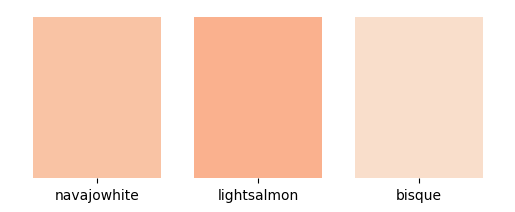

In [185]:
def display_palette(palette):

    fig, ax = plt.subplots()
    ax.set_aspect(aspect='equal', adjustable='box')

    # Create a bar for each color, setting the color and a dummy height (1)
    bars = ax.bar(range(len(palette)), np.ones(len(palette)), color=np.array(palette)/255)
    # Remove axis
    ax.yaxis.set_visible(False)
    ax.set_xticks([i for i, _ in enumerate(palette)])
    ax.set_xticklabels(name_color(palette))
    for spine in ax.spines.values():
        spine.set_visible(False)
    plt.show()


image_url = 'https://www.realsimple.com/thmb/UyHZyKYc8Rt2x_-shoEPPT2x5Cs=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/pantone-color-of-the-year-peach-fuzz-cac0d358c14e411686ea97bc3e70d0e4.jpg'
pal = get_color_palette(get_image(image_url), 3)
display_palette(pal)

In [183]:
def display_palette_cluster(palette):

    fig, ax = plt.subplots()
    ax.set_aspect(aspect='equal', adjustable='box')

    # Create a bar for each color, setting the color and a dummy height (1)
    bars = ax.bar(range(len(palette)), np.ones(len(palette)), color=np.array(palette)/255)
    # Remove axis
    ax.yaxis.set_visible(False)
    ax.set_xticks([i for i, _ in enumerate(palette)])
    ax.set_xticklabels(name_color_cluster(palette))
    for spine in ax.spines.values():
        spine.set_visible(False)
    plt.show()

[(47, 137, 167), (106, 141, 153), (139, 165, 172), (41, 79, 95), (79, 114, 129)]


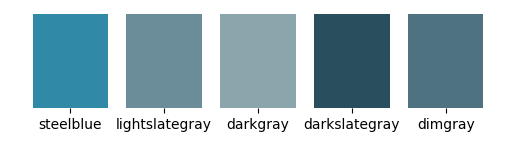

In [124]:
# winner
two = get_color_palette(im)
print(two)
display_palette(two)

[(137, 160, 170), (135, 165, 174), (59, 145, 173), (132, 162, 169), (135, 163, 169)]


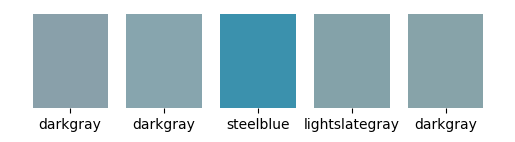

In [125]:
three = get_color_palette_rank(im)
print(three)
display_palette(three)

Rgb to pantone
https://github.com/jaysobel/rgb-to-pantone/tree/master


no se para que quiero esto pero bueno ahi queda

In [187]:
import webcolors

def name_color(rgb_tuples):
    if type(rgb_tuples) == tuple:
        rgb_tuples = [rgb_tuples]
    names = []
    for color in rgb_tuples:
      min_colors = {} # miknimum euclidean distance
      for key, name in webcolors.CSS3_HEX_TO_NAMES.items():
          r_c, g_c, b_c = webcolors.hex_to_rgb(key)
          rd = (r_c - color[0]) ** 2
          gd = (g_c - color[1]) ** 2
          bd = (b_c - color[2]) ** 2
          min_colors[(rd + gd + bd)] = name
      names.append(min_colors[min(min_colors.keys())])
    return names

name_color(pal[0])

['navajowhite']

In [189]:
def name_color_cluster(rgb_tuples):
    if type(rgb_tuples) == tuple:
        rgb_tuples = [rgb_tuples]
    names = []
    for color in rgb_tuples:
       h, s, l = rgb_to_hsl(color)
        if s < 5 or l > 80:
          cluster_name = 'white'
        else:
          cluster_name = name_color_cluster(color)[0]
        if cluster_name not in clustered_palette:
            clustered_palette[cluster_name] = color
    clustered_palette = list(clustered_palette.values())



      min_colors = {} # miknimum euclidean distance
      for key, name in webcolors.CSS3_HEX_TO_NAMES.items():
          r_c, g_c, b_c = webcolors.hex_to_rgb(key)
          rd = (r_c - color[0]) ** 2
          gd = (g_c - color[1]) ** 2
          bd = (b_c - color[2]) ** 2
          min_colors[(rd + gd + bd)] = name
      names.append(inverted_color_clusters[min_colors[min(min_colors.keys())]])

    for color in vibrant_palette:


    return names

name_color_cluster(pal[0])

['wheat']

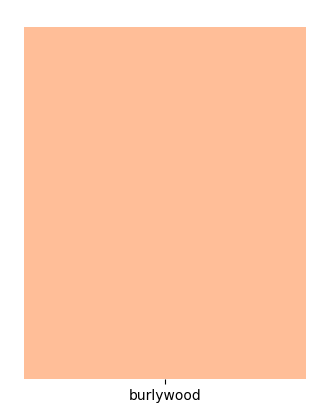

In [188]:
display_palette([(255, 190, 152)])
name_color((255, 190, 152))
color_of_the_year = (255, 190, 152)
color_of_the_year_norm = (255/255, 190/255, 152/255)

In [19]:
# import pickle
# from scipy.spatial import distance
# import pandas as pd

# # Load in the rgb-pantone mapping
# rgb_to_pantone = pickle.load(open("rgb_to_pantone.p", "rb"))

# # The following method could be vectorized with something like
# # min(sqrt (rgb_keys - rgb_target .^2))

# def closest_pantone(color_rgb_tuple):
#     rgb_keys = list(rgb_to_pantone.keys())
#     # maximum rgb distance = sqrt(3*(255^2)) = 441.67...
#     min_dist = 442
#     i_min = -1
#     # iterate pantone color keys
#     for i in range(0, len(rgb_keys)):
#         # convert the key to a tuple
#         x2 = rgb_keys[i].split(", ")
#         x2 = tuple(map(int, x2))
#         dist = distance.euclidean(color_rgb_tuple, x2)
#         # update min
#         if dist < min_dist:
#             min_dist = dist
#             i_min = i
#     return rgb_to_pantone[rgb_keys[i_min]]


# for p in pal:
#    print(closest_pantone(p))

## Color categories (names)

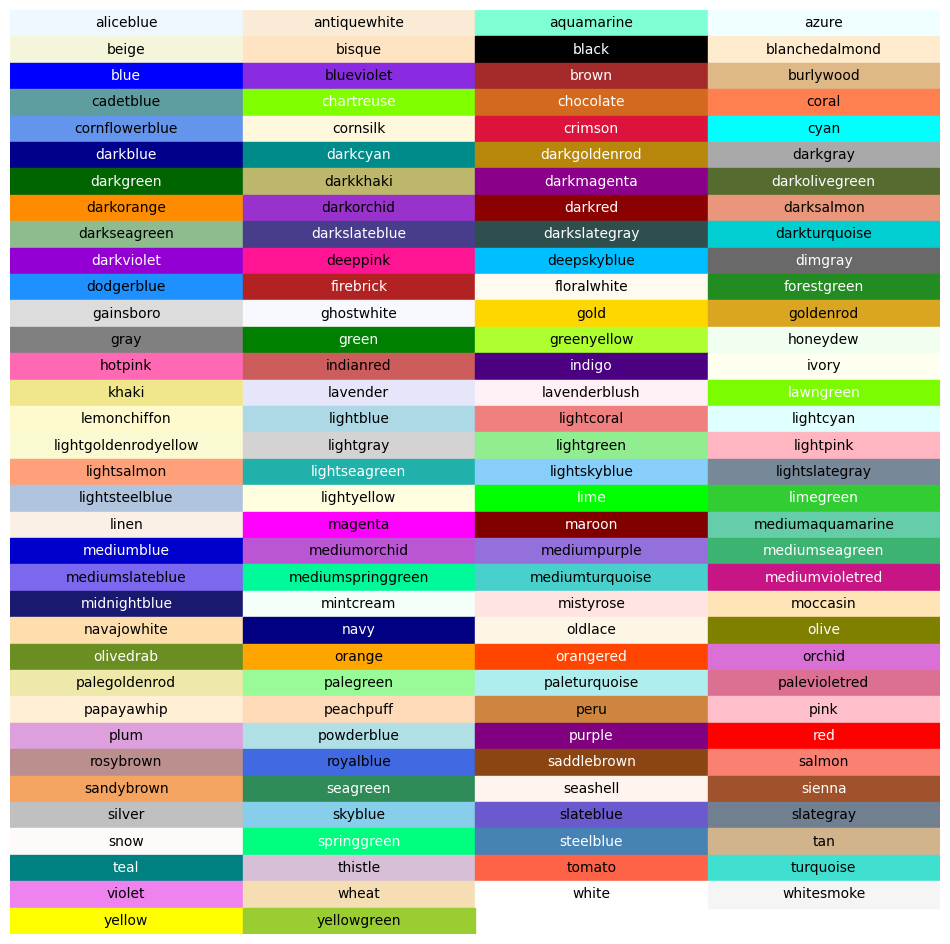

In [20]:

# Extract CSS3 colors
hex_names = list(webcolors.CSS3_HEX_TO_NAMES.items())

# Sort the list alphabetically by color names
hex_names_sorted = sorted(hex_names, key=lambda x: x[1])

# Convert hex codes to RGB and normalize values
colors_rgb = np.array([webcolors.hex_to_rgb(hex) for hex, _ in hex_names_sorted]) / 255.0

names = [name for _, name in hex_names_sorted]

# Plotting
fig, ax = plt.subplots(figsize=(12, 12))
num_rows = int(np.ceil(len(colors_rgb) / 4))

for idx, (color, name) in enumerate(zip(colors_rgb, names)):
    col_idx = idx % 4
    row_idx = idx // 4

    rect = plt.Rectangle([col_idx, num_rows - row_idx - 1], 1, 1, color=color)
    ax.add_artist(rect)
    ax.text(col_idx + 0.5, num_rows - row_idx - 0.5, name, ha='center', va='center', fontsize=10,
            color='white' if np.mean(color) < 0.5 else 'black')

ax.set_xlim(0, 4)
ax.set_ylim(0, num_rows)
ax.axis('off')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


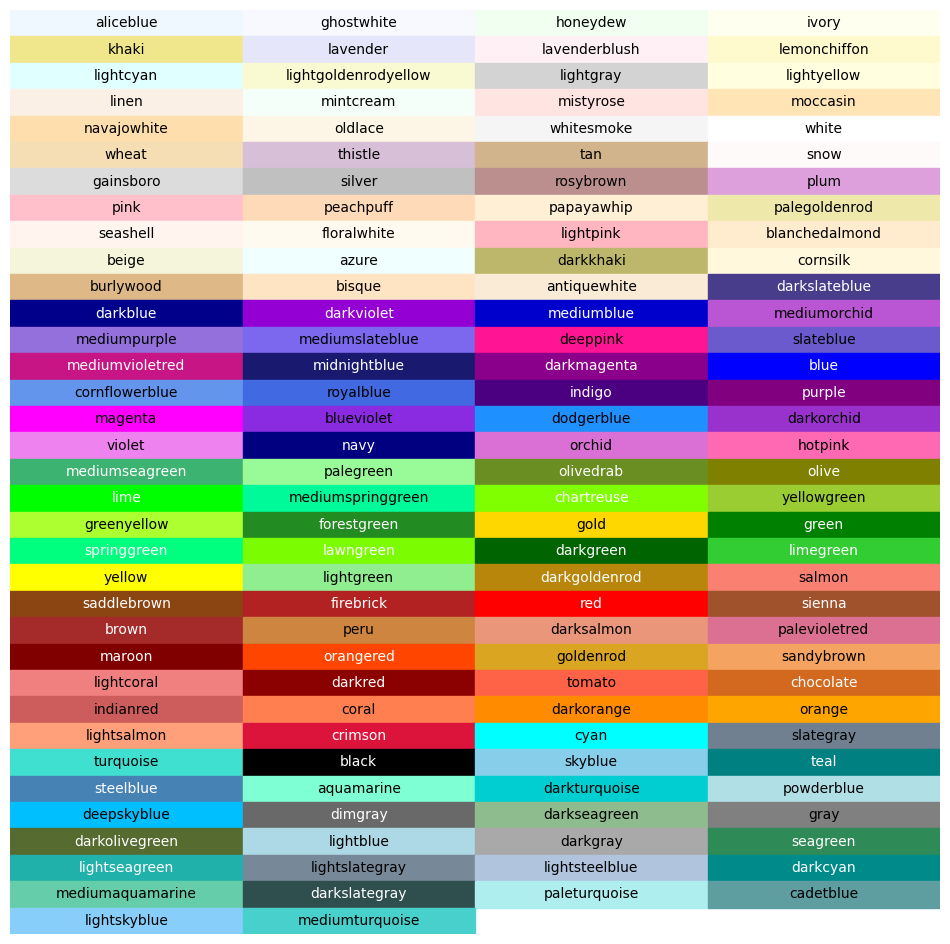

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import webcolors
from skimage.color import rgb2lab, lab2rgb
from sklearn.cluster import KMeans

def hex_to_rgb(value):
    """Convert HEX to RGB."""
    value = value.lstrip('#')
    return np.array([int(value[i:i+2], 16) for i in (0, 2, 4)]) / 255.0

# Extract CSS3 colors
hex_names = list(webcolors.CSS3_HEX_TO_NAMES.items())
colors_rgb = np.array([hex_to_rgb(hex) for hex, _ in hex_names])

# Convert RGB colors to Lab
colors_lab = rgb2lab(colors_rgb.reshape(1, -1, 3)).reshape(-1, 3)

# Cluster colors using K-means in Lab space
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
clusters = kmeans.fit_predict(colors_lab)

# Sort colors by cluster
sorted_indices = np.argsort(clusters)
sorted_colors_rgb = colors_rgb[sorted_indices]
sorted_names = np.array([name for _, name in hex_names])[sorted_indices]

# Plotting
fig, ax = plt.subplots(figsize=(12, 12))
num_rows = int(np.ceil(len(sorted_colors_rgb) / 4))

for idx, (color, name) in enumerate(zip(sorted_colors_rgb, sorted_names)):
    col_idx = idx % 4
    row_idx = idx // 4

    rect = plt.Rectangle([col_idx, num_rows - row_idx - 1], 1, 1, color=color)
    ax.add_artist(rect)
    ax.text(col_idx + 0.5, num_rows - row_idx - 0.5, name, ha='center', va='center', fontsize=10,
            color='white' if np.mean(color) < 0.5 else 'black')

ax.set_xlim(0, 4)
ax.set_ylim(0, num_rows)
ax.axis('off')
plt.show()


In [240]:
color_clusters = {'white': ['aliceblue', 'seashell', 'snow',  'mintcream',  'white', 'whitesmoke', 'ghostwhite', 'ivory' ],
                 'beige': [ 'beige',  'bisque', 'linen',  'cornsilk',  'antiquewhite', 'oldlace',  'papayawhip',  'floralwhite',  'blanchedalmond',   'honeydew'],
                 'light Yellow': [ 'lemonchiffon',  'lightgoldenrodyellow',  'lightyellow'],
                 'light blue': ['lightcyan',  'lightblue', 'azure',  'powderblue',  'paleturquoise',  'lightskyblue',  'skyblue'],
                 'blue': [ 'royalblue',  'dodgerblue',  'blue',  'deepskyblue',  'steelblue',  'cornflowerblue', 'mediumturquoise', 'lightseagreen'],
                 'navy blue': ['navy', 'midnightblue',  'darkblue', 'mediumblue',  'cyan',  'darkslategray',  'teal'],
                 'purple': [ 'darkslateblue',  'mediumslateblue', 'slateblue',  'purple',  'indigo'],
                 'lavender': [ 'lavender',  'mediumpurple',  'thistle',  'plum'],
                 'violet': ['darkorchid', 'blueviolet',  'darkviolet',  'mediumorchid',  'darkmagenta'],
                 'pink' : ['violet',   'hotpink',   'palevioletred',  'orchid'],
                 'light pink': ['lavenderblush',  'pink',  'lightpink', 'mistyrose'],
                 'fuchsia':[ 'mediumvioletred',  'deeppink', 'magenta'],
                 'coral': [  'coral',  'lightcoral'],
                 'red': [ 'crimson',  'red'],
                 'burgundy': [ 'darkred',  'maroon', 'firebrick',  'indianred'],
                 'orange': [ 'darkorange',  'orange', 'tomato',  'orangered'],
                 'teal': [ 'cadetblue',  'darkcyan'],
                 'aquamarine': [ 'aquamarine',  'turquoise',    'mediumaquamarine',  'darkturquoise'],
                 'green': [ 'chartreuse',  'lime',  'forestgreen',  'green',  'lawngreen',  'springgreen',    'mediumseagreen','mediumspringgreen',  'limegreen'],
                 'light green': [ 'darkseagreen',  'lightgreen',  'palegreen'],
                 'dark green': [ 'darkgreen', 'darkolivegreen'],
                 'olive': [ 'darkkhaki', 'olive', 'olivedrab'],
                 'lime': [ 'greenyellow',  'yellowgreen'],
                 'gray': ['lightsteelblue',  'darkgray',  'dimgray',  'gray',  'lightgray',  'lightslategray', 'slategray',  'silver',  'gainsboro'],
                 'black': ['black'],
                 'brown': [ 'brown', 'rosybrown', 'saddlebrown','sandybrown','seagreen',  'sienna',  'peru',  'chocolate'],
                 'light brown': [ 'tan',  'goldenrod',  'darkgoldenrod'],
                 'wheat': [ 'wheat', 'burlywood',  'moccasin', 'navajowhite',  'palegoldenrod'],
                 'yellow': ['gold',  'yellow',  'khaki'],
                 'peach fuzz': [ 'peachpuff', 'lightsalmon', 'salmon', 'darksalmon'] # hermano de coral y de wheat
}

In [23]:
set([item for sublist in color_clusters.values() for item in sublist]) == set(webcolors.CSS3_HEX_TO_NAMES.values())

True

## Colors RGB 3D visualisation

RGB
Binary Basis: Computers work in binary, meaning they use bits that can be 0 or 1. A group of 8 bits makes a byte, and a single byte can represent values from 0 to 255. This is because
2 ^
8
=
256 possible values can be represented, and starting from 0, the highest value is 255. Each color in the RGB model (Red, Green, Blue) is allocated one byte.

In [77]:
import plotly.graph_objects as go

def plot_on_rgb_cube(rgb_tuples, labels=None):
    if type(rgb_tuples) == tuple:
        rgb_tuples = [rgb_tuples]
    # Cube vertices
    vertices_x = [0, 0, 0, 0, 255, 255, 255, 255]
    vertices_y = [0, 0, 255, 255, 0, 0, 255, 255]
    vertices_z = [0, 255, 0, 255, 0, 255, 0, 255]
    vertices_colors = ['rgb(0,0,0)', 'rgb(0,0,255)', 'rgb(0,255,0)', 'rgb(0,255,255)',
                       'rgb(255,0,0)', 'rgb(255,0,255)', 'rgb(255,255,0)', 'rgb(255,255,255)']

    # New points
    new_x, new_y, new_z = zip(*rgb_tuples)
    new_colors = ['rgb({},{},{})'.format(r, g, b) for r, g, b in rgb_tuples]

    # Combine the cube vertices and the new points
    vertices_and_new_x = vertices_x + list(new_x)
    vertices_and_new_y = vertices_y + list(new_y)
    vertices_and_new_z = vertices_z + list(new_z)
    colors = vertices_colors + new_colors

    # Create the figure
    fig = go.Figure()

    # Add the cube vertices with cross markers
    fig.add_trace(go.Scatter3d(x=vertices_x, y=vertices_y, z=vertices_z, mode='markers',  name='',  hoverinfo='none' ,
                               marker=dict(symbol='cross', size=10, color=vertices_colors, opacity=0.8)))

    # Add the input data points with circle markers
    fig.add_trace(go.Scatter3d(x=list(new_x), y=list(new_y), z=list(new_z), mode='markers+text', text=labels, name='',
                               marker=dict(symbol='circle', size=12, color=new_colors, opacity=0.8),
                               textposition='top center'))

    # Conditionally add text labels if they are provided
    if labels:
        fig.data[1].text = list(labels)  # Add labels only to the input data points

    # Update plot layout for a better view
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0), scene=dict(
        xaxis_title='Red',
        yaxis_title='Green',
        zaxis_title='Blue',
        xaxis=dict(range=[-10, 265]),
        yaxis=dict(range=[-10, 265]),
        zaxis=dict(range=[-10, 265]),
    ))

    # Show plot
    fig.show()
    pass

plot_on_rgb_cube(color_of_the_year, labels=['Color of the Year 2024'])

In [58]:
color_of_the_year

(255, 190, 152)

rgb colour plot

In [25]:
[name_color(p) for p in pal]

['navajowhite', 'bisque', 'lightsalmon']

In [26]:
def explore_color_volume(color_name, step=3, edge=50):
    color_rgb = webcolors.name_to_rgb(color_name)
    volume_points = [(color_rgb[0], color_rgb[1], color_rgb[2])]
    for r in range(max(0, color_rgb[0]-edge), min(255, color_rgb[0]+edge), step):
        for g in range(max(0, color_rgb[1]-edge), min(255, color_rgb[1]+edge+1), step):
            for b in range(max(0, color_rgb[2]-edge), min(255, color_rgb[2]+edge+1), step):
                if name_color((r, g, b)) == color_name:
                  volume_points.append((r, g, b))
    return volume_points

In [63]:
plot_on_rgb_cube(explore_color_volume('burlywood'))

In [64]:
plot_on_rgb_cube(explore_color_volume('lightsalmon'))

In [137]:
plot_on_rgb_cube(explore_color_volume('lavender', edge=70))

In [66]:
plot_on_rgb_cube(explore_color_volume('red', edge=70))

Here's how this function works:

It initializes an empty dictionary min_colors to store the squared distances between the input RGB color and each color in the CSS3_HEX_TO_NAMES dictionary.

It iterates over each color name and RGB value pair in the CSS3_HEX_TO_NAMES dictionary.

For each color, it calculates the squared Euclidean distance between the input RGB color and the RGB color of the current name in the loop.

It stores the sum of squared differences as the key in the min_colors dictionary and the color name as the value.

After computing the squared distances for all colors, it retrieves the color name corresponding to the smallest sum of squared differences. This color name is considered the closest match to the input RGB color.

This function essentially finds the closest color name in the CSS3_HEX_TO_NAMES dictionary to the input RGB color based on the Euclidean distance in RGB space. It provides a simple mapping from RGB values to color names defined in the CSS3 standard.

In [241]:
inverted_color_clusters = {value: key for key, list_of_values in color_clusters.items() for value in list_of_values}

In [68]:
def explore_color_volume_clusters(color_name, step=3, edge=100):
    color_rgb = webcolors.name_to_rgb(color_clusters[color_name.lower()][0].lower())
    volume_points = [(color_rgb[0], color_rgb[1], color_rgb[2])]
    for r in range(max(0, color_rgb[0]-edge), min(255, color_rgb[0]+edge), step):
        for g in range(max(0, color_rgb[1]-edge), min(255, color_rgb[1]+edge+1), step):
            for b in range(max(0, color_rgb[2]-edge), min(255, color_rgb[2]+edge+1), step):
                if inverted_color_clusters[name_color((r, g, b))].lower() == color_name.lower():
                  volume_points.append((r, g, b))
    return volume_points

In [69]:
plot_on_rgb_cube(explore_color_volume_clusters('pink'))

In [70]:
plot_on_rgb_cube(explore_color_volume_clusters('fuchsia', edge=150))

In [71]:
plot_on_rgb_cube(explore_color_volume_clusters('violet'))

In [75]:
color_clusters_mean_rgb={}

for key, values in color_clusters.items():
    values_rgb = np.array([webcolors.name_to_rgb(value) for value in values])
    mean_rgb = np.mean(values_rgb, axis=0)
    mean_rgb_rounded = tuple(map(int, np.round(mean_rgb)))
    color_clusters_mean_rgb[key] = mean_rgb_rounded


color_clusters_mean_rgb

{'white': (250, 250, 248),
 'beige': (251, 242, 221),
 'light Yellow': (253, 252, 213),
 'light blue': (180, 229, 242),
 'blue': (44, 120, 234),
 'navy blue': (5, 56, 168),
 'purple': (101, 51, 168),
 'lavender': (204, 173, 226),
 'violet': (153, 36, 198),
 'pink': (232, 115, 195),
 'light pink': (255, 210, 216),
 'fuchsia': (236, 14, 178),
 'coral': (248, 128, 104),
 'red': (238, 10, 30),
 'burgundy': (134, 0, 0),
 'brick': (192, 63, 63),
 'orange': (255, 118, 18),
 'teal': (48, 148, 150),
 'aquamarine': (57, 201, 186),
 'green': (44, 213, 53),
 'light green': (146, 226, 146),
 'dark green': (42, 104, 24),
 'olive': (141, 151, 47),
 'lime': (164, 230, 48),
 'gray': (148, 156, 162),
 'black': (0, 0, 0),
 'brown': (170, 110, 66),
 'light brown': (204, 160, 61),
 'wheat': (243, 218, 168),
 'yellow': (250, 233, 47),
 'peach fuzz': (248, 164, 136)}

In [42]:
color_clusters_mean_rgb.values()

dict_values([(250, 250, 248), (251, 242, 221), (253, 252, 213), (180, 229, 242), (44, 120, 234), (5, 56, 168), (101, 51, 168), (204, 173, 226), (153, 36, 198), (232, 115, 195), (255, 210, 216), (236, 14, 178), (248, 128, 104), (238, 10, 30), (134, 0, 0), (192, 63, 63), (255, 118, 18), (48, 148, 150), (57, 201, 186), (44, 213, 53), (146, 226, 146), (42, 104, 24), (141, 151, 47), (164, 230, 48), (148, 156, 162), (0, 0, 0), (170, 110, 66), (204, 160, 61), (243, 218, 168), (250, 233, 47), (248, 164, 136)])

In [219]:
plot_on_rgb_cube(list(color_clusters_mean_rgb.values()), labels=list(color_clusters_mean_rgb.keys()))

# FIX!

In [79]:

plot_on_rgb_cube(explore_color_volume_clusters('peach fuzz'))


In [80]:
plot_on_rgb_cube(explore_color_volume_clusters('coral'))


# webscraping Vogue covers

In [ ]:
from bs4 import BeautifulSoup

response = requests.get('https://archive.vogue.com/issues/2023')
soup = BeautifulSoup(response.text, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html lang="en-US" ng-app="">
 <head>
  <title>
   The Complete Vogue Archive
  </title>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1.0, minimum-scale=1.0, user-scalable=yes" name="viewport"/>
  <link href="https://vogue.archive.content.pugpig.com/vogue/favicon.png" rel="shortcut icon"/>
  <meta content="index,follow" name="robots"/>
  <meta content="index,follow" name="googlebot"/>
  <meta content="notranslate" name="google"/>
  <meta content="website" property="og:type"/>
  <meta content="Vogue | The Complete Archive" property="og:site_name"/>
  <meta content="https://archive.vogue.com/issues/2023" property="og:url"/>
  <meta content="Explore every issue of Vogue published in 2023." name="description"/>
  <meta content="The Complete Vogue Archive" property="og:title"/>
  <meta content="Explore every issue of Vogue published in 2023." property="og:description"/>
  <link 

In [ ]:
#soup.find('div', class_="bnd_browseissues ui special four doubling cards")
soup.find('main')



<main id="main_content" role="main">
<div data-timeline="eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.Ilt7XCJEZWNhZGVOYW1lXCI6XCIyMDIwc1wiLFwiRGVjYWRlU3RhcnRcIjoyMDI0LFwiWWVhcnNcIjpbe1wiWWVhclwiOlwiMjAyNFwiLFwiSXNzdWVzXCI6W3tcIkNvdmVyWWVhclwiOjIwMjQsXCJDb3ZlckRhdGVcIjpcIjIwMjQtMDItMDFUMDA6MDA6MDBcIixcIkNvdmVyRGlzcGxheURhdGVcIjpcIldJTlRFUiAyMDI0XCIsXCJJc3N1ZUtleVwiOjIwMjQwMjAxLFwiQ292ZXJXaWR0aFwiOjAsXCJDb3ZlckhlaWdodFwiOjAsXCJWb2x1bWVcIjpcIjIxNFwiLFwiSXNzdWVOdW1iZXJcIjpcIjFcIixcIklzc3VlTmFtZVwiOlwiXCIsXCJGcmVlXCI6ZmFsc2UsXCJIYXNBY2Nlc3NcIjpmYWxzZSxcIkxhdGVzdElzc3VlXCI6dHJ1ZX1dfSx7XCJZZWFyXCI6XCIyMDIzXCIsXCJJc3N1ZXNcIjpbe1wiQ292ZXJZZWFyXCI6MjAyMyxcIkNvdmVyRGF0ZVwiOlwiMjAyMy0xMi0wMVQwMDowMDowMFwiLFwiQ292ZXJEaXNwbGF5RGF0ZVwiOlwiREVDRU1CRVIgMjAyM1wiLFwiSXNzdWVLZXlcIjoyMDIzMTIwMSxcIkNvdmVyV2lkdGhcIjowLFwiQ292ZXJIZWlnaHRcIjowLFwiVm9sdW1lXCI6XCIyMTNcIixcIklzc3VlTnVtYmVyXCI6XCIxMFwiLFwiSXNzdWVOYW1lXCI6XCJcIixcIkZyZWVcIjpmYWxzZSxcIkhhc0FjY2Vzc1wiOmZhbHNlLFwiTGF0ZXN0SXNzdWVcIjpmYWxzZX0se1wiQ292ZXJZZWFyXC

In [ ]:
soup.find_all('div')


[<div id="top"></div>,
 <div id="main-header">
 <div aria-label="Secondary" class="user_menu_wrapper" role="navigation">
 <div class="ui container">
 <ul class="user_menu">
 <li class="menunav"><a href="https://www.vogue.com/">vogue.com</a></li>
 <li class="user_menu_1 login"><a aria-label="Log In" class="" href="/login" role="menuitem" tabindex="0">Log In</a></li>
 <li class="user_menu_2"><a href="mailto:VogueArchive@condenast.com">Questions?</a></li>
 </ul>
 </div>
 </div>
 <div aria-label="Primary" class="main_nav_wrapper ui container" role="navigation">
 <a aria-haspopup="true" aria-label="Open Mobile Menu Navigation" class="bnd_mobilemenu_toggle" href="javascript:void(0);" id="mblmenu_toggle" tabindex="0"><i class="sidebar icon"></i></a>
 <a aria-label="Vogue Archive Homepage" class="main_nav_logo" href="/" tabindex="0" title="Vogue Archive">Vogue Archive</a>
 <div class="main_nav">
 <ul class="site_menu">
 <li class="menunav"><a aria-haspopup="true" aria-label="Browse Issues" cla

In [ ]:
soup.find('h2', class_="bnd_browseissues_title_year")

# load and clean Zara and H&M data

In [97]:
import pandas as pd
import ast

In [99]:
mango = pd.read_csv('store_mango.csv')
zara = pd.read_csv('store_zara.csv')

### MANGO

https://www.kaggle.com/code/maparla/reading-mango-products

In [ ]:
mango.head(50)

brand                                                url       sku  \
0   Mango  https://shop.mango.com/fi/women/jackets-and-su...  67050682   
1   Mango  https://shop.mango.com/fi/women/jackets-and-su...  67044062   
2   Mango  https://shop.mango.com/fi/women/jackets-and-su...  67074074   
3   Mango  https://shop.mango.com/fi/women/jackets-and-su...  57035980   
4   Mango  https://shop.mango.com/fi/women/jackets-and-su...  57068270   
5   Mango  https://shop.mango.com/fi/women/jackets-and-ov...  67073271   
6   Mango  https://shop.mango.com/fi/women/jackets-and-su...  67075141   
7   Mango  https://shop.mango.com/fi/women/jackets-and-su...  67074476   
8   Mango  https://shop.mango.com/fi/women/jackets-and-su...  67054049   
9   Mango  https://shop.mango.com/fi/women/jackets-and-su...  67075757   
10  Mango  https://shop.mango.com/fi/women/jackets-and-su...  67054033   
11  Mango  https://shop.mango.com/fi/women/coats-trench-c...  67084018   
12  Mango  https://shop.mango.com/fi/women/jackets-and-su...  67084022   
13  Mango  https://shop.mango.com/fi/women/jackets-and-su...  67094032   
14  Mango  https://shop.mango.com/fi/women/jackets-and-su...  67094039   
15  Mango  https://shop.mango.com/fi/women/jackets-and-su...  67094061   
16  Mango  https://shop.mango.com/fi/women/jackets-and-su...  67093269   
17  Mango  https://shop.mango.com/fi/women/jackets-and-su...  67095755   
18  Mango  https://shop.mango.com/fi/women/jackets-and-su...  67043263   
19  Mango  https://shop.mango.com/fi/women/jackets-and-su...  67054040   
20  Mango  https://shop.mango.com/fi/women/jackets-and-su...  67081506   
21  Mango  https://shop.mango.com/fi/women/jackets-and-su...  67063693   
22  Mango  https://shop.mango.com/fi/women/jackets-and-su...  67073694   
23  Mango  https://shop.mango.com/fi/women/jackets-and-su...  67074072   
24  Mango  https://shop.mango.com/fi/women/jackets-and-su...  67040485   
25  Mango  https://shop.mango.com/fi/women/jackets-and-su...  67094477   
26  Mango  https://shop.mango.com/fi/women/jackets-and-su...  57045982   
27  Mango  https://shop.mango.com/fi/women/jackets-and-su...  57098265   
28  Mango  https://shop.mango.com/fi/women/jackets-and-su...  57046716   
29  Mango  https://shop.mango.com/fi/women/jackets-and-su...  67063696   
30  Mango  https://shop.mango.com/fi/women/jackets-and-su...  57099123   
31  Mango  https://shop.mango.com/fi/women/jackets-and-su...  57057727   
32  Mango  https://shop.mango.com/fi/women/jackets-and-su...  57075985   
33  Mango  https://shop.mango.com/fi/women/jackets-and-su...  57039122   
34  Mango  https://shop.mango.com/fi/women/jackets-and-su...  67720522   
35  Mango  https://shop.mango.com/fi/women/jackets-and-su...  57088266   
36  Mango  https://shop.mango.com/fi/women/jackets-and-su...  67035758   
37  Mango  https://shop.mango.com/fi/women/jackets-and-su...  57094433   
38  Mango  https://shop.mango.com/fi/women/jackets-and-su...  67074021   
39  Mango  https://shop.mango.com/fi/women/jackets-and-su...  57063813   
40  Mango  https://shop.mango.com/fi/women/jackets-and-su...  57075958   
41  Mango  https://shop.mango.com/fi/women/jackets-and-su...  67074073   
42  Mango  https://shop.mango.com/fi/women/jackets-and-su...  67070436   
43  Mango  https://shop.mango.com/fi/women/jackets-and-su...  67060454   
44  Mango  https://shop.mango.com/fi/women/jackets-and-su...  57095999   
45  Mango  https://shop.mango.com/fi/women/jackets-and-su...  57078639   
46  Mango  https://shop.mango.com/fi/women/jackets-and-su...  57006024   
47  Mango  https://shop.mango.com/fi/women/jackets-and-su...  67060434   
48  Mango  https://shop.mango.com/fi/women/jackets-and-su...  57030292   
49  Mango  https://shop.mango.com/fi/women/jackets-and-su...  67034792   

                                     name  \
0                  chaqueta lana cinturón   
1                  chaqueta punto botones   
2        chaqueta tweed detalle contraste   
3       cazadora vaquera cordón ajustable   
4   

In [ ]:
mango.iloc[0]

brand                                                          Mango
url                https://shop.mango.com/fi/women/jackets-and-su...
sku                                                         67050682
name                                          chaqueta lana cinturón
description        wool mix fabric, straight design, crossover de...
price                                                          69.99
currency                                                         EUR
category                                      chaquetas y americanas
images             ['https://st.mngbcn.com/rcs/pics/static/T6/fot...
scraped_at                                2024-02-21T12:51:19.171380
terms                                                        jackets
section                                                            H
image_downloads    ['db68f55d-92f1-43e5-b038-f1708dd75daf', '0c1c...
Name: 0, dtype: object

In [ ]:
mango.iloc[-1]

brand                                                          Mango
url                https://shop.mango.com/fi/women/shirts-shirts/...
sku                                                         57075809
name                                             camisa punto canalé
description        cable knit fabric, fine knit fabric, shirt-sty...
price                                                          15.99
currency                                                         EUR
category                                                     camisas
images             ['https://st.mngbcn.com/rcs/pics/static/T5/fot...
scraped_at                                2024-02-21T13:05:49.560565
terms                                                       knitwear
section                                                    M,S,I,T,V
image_downloads    ['9ca94b0e-49ee-4922-b896-e3c691eced7b', '9605...
Name: 2027, dtype: object

In [ ]:
mango.shape

(2028, 13)

In [ ]:
mango.dtypes

brand               object
url                 object
sku                  int64
name                object
description         object
price              float64
currency            object
category            object
images              object
scraped_at          object
terms               object
section             object
image_downloads     object
dtype: object

In [ ]:
mango.describe()

sku        price
count  2.028000e+03  2028.000000
mean   6.185369e+07    43.132327
std    5.137288e+06    38.657919
min    4.700026e+07     3.900000
25%    5.704554e+07    22.990000
50%    5.709774e+07    34.990000
75%    6.705035e+07    49.990000
max    6.798051e+07   399.990000

In [172]:
mango.section.unique()

array(['H', 'M,S,I,T,V'], dtype=object)

In [181]:
mango.loc[mango['section']=='M,S,I,T,V'].values

array([['Mango',
        'https://shop.mango.com/fi/women/dresses-and-jumpsuits-dresses/halter-neck-crochet-dress_57001013.html',
        57001013, ..., 'dresses', 'M,S,I,T,V',
        "['a23015ff-d85d-4deb-916b-3b0ea9d8d015', '9f50e813-0b49-44c1-969b-d729262b9628', '23a5178b-75bb-4429-8624-1d3b5bb2fd07', '3f61b482-18f9-4876-a177-781ba1ab9cae']"],
       ['Mango',
        'https://shop.mango.com/fi/women/dresses-and-jumpsuits-dresses/polka-dot-midi-dress_67090463.html',
        67090463, ..., 'dresses', 'M,S,I,T,V',
        "['b80f29c9-3037-4817-9046-97df31116a8f', '1ff4ef2e-836e-4056-8490-bde333503e72', 'd0202add-9c87-4a15-b29a-dd3d47700888', 'f62f5b91-1c30-4afc-a38c-ae6b3143640c']"],
       ['Mango',
        'https://shop.mango.com/fi/women/dresses-and-jumpsuits-dresses/satin-tie-dye-dress_57036028.html',
        57036028, ..., 'dresses', 'M,S,I,T,V',
        "['d2898175-7d6f-44fd-a3ed-736e40980e3c', '25b31a87-0c56-4ca0-bc2c-f0229d4e03c6', 'b8ad0d23-b110-4803-8f42-f4b9a615f662', '8e2

In [189]:
mango.iloc[0]['url'][26:31]

'women'

In [206]:
def convert_section_to_women(row):
    if row['url'][26:31] == 'women':
        return 'WOMAN'
    else:
        return 'OTHER'

mango['section'] = mango.apply(convert_section_to_women, axis=1)
mango.head()

brand                                                url       sku  \
0  Mango  https://shop.mango.com/fi/women/jackets-and-su...  67050682   
1  Mango  https://shop.mango.com/fi/women/jackets-and-su...  67044062   
2  Mango  https://shop.mango.com/fi/women/jackets-and-su...  67074074   
3  Mango  https://shop.mango.com/fi/women/jackets-and-su...  57035980   
4  Mango  https://shop.mango.com/fi/women/jackets-and-su...  57068270   

                                name  \
0             chaqueta lana cinturón   
1             chaqueta punto botones   
2   chaqueta tweed detalle contraste   
3  cazadora vaquera cordón ajustable   
4           chaqueta acolchada denim   

                                         description  price currency  \
0  wool mix fabric, straight design, crossover de...  69.99      EUR   
1  cotton-blend fabric, medium knit, straight des...  49.99      EUR   
2  tweed fabric, cotton-blend fabric, straight de...  69.99      EUR   
3  denim style cotton fabric, 100% cotton fabric,...  29.99      EUR   
4  denim style cotton fabric, straight design, ro...  34.99      EUR   

                 category                                             images  \
0  chaquetas y americanas  ['https://st.mngbcn.com/rcs/pics/static/T6/fot...   
1  chaquetas y americanas  ['https://st.mngbcn.com/rcs/pics/static/T6/fot...   
2  chaquetas y americanas  ['https://st.mngbcn.com/rcs/pics/static/T6/fot...   
3  chaquetas y americanas  ['https://st.mngbcn.com/rcs/pics/static/T5/fot...   
4  chaquetas y americanas  ['https://st.mngbcn.com/rcs/pics/static/T5/fot...   

                   scraped_at    terms section  \
0  2024-02-21T12:51:19.171380  jackets   WOMAN   
1  2024-02-21T12:51:30.009099  jackets   WOMAN   
2  2024-02-21T12:51:31.719633  jackets   WOMAN   
3  2024-02-21T12:51:32.478754  jackets   WOMAN   
4  2024-02-21T12:51:33.032029  jackets   WOMAN   

                                     image_downloads  
0  ['db68f55d-92f1-43e5-b038-f1708dd75daf', '0c1c...  
1  ['3f64f51b-d437-4ae8-89f5-7da1adcb4f4e', 'aee6...  
2  ['76c2fa43-be2b-4d5a-b6a8-04900e32335c', '873f...  
3  ['512ab173-7474-4d2a-8597-5a73429f3ff6', '0d49...  
4  ['622ffabe-2e0e-4f4a-a98f-61a774704501', '73dd...

In [207]:
mango.loc[mango['section']=='H']

Empty DataFrame
Columns: [brand, url, sku, name, description, price, currency, category, images, scraped_at, terms, section, image_downloads]
Index: []

In [ ]:
mango.terms.unique()

array(['jackets', 'puffers', 'pants', 'jeans', 'sweaters', 'cardigans',
       'hoodies', 't-shirts', 'overshirts', 'linen', 'shorts', 'suits',
       'cargo', 'shoes', 'bags', 'backpack', 'dresses', 'skirts', 'tops',
       'knitwear'], dtype=object)

In [ ]:
mango.category.unique()

array(['chaquetas y americanas', 'abrigos', 'jerseis y cardigans',
       'zapatos', 'pijamas', 'pantalones', 'vaqueros', 'faldas',
       'vestidos y monos', 'camisas', 'sombreros y gorras',
       'marroquineria', 'mas accesorios', 'bolsos', 'bisuteria',
       'sudaderas', 'camisetas y tops', 'fulares y panuelos',
       'bikinis y banadores'], dtype=object)

In [ ]:
mango.isnull().sum()

brand              0
url                0
sku                0
name               0
description        0
price              0
currency           0
category           0
images             0
scraped_at         0
terms              0
section            0
image_downloads    0
dtype: int64

In [18]:
mango.drop(columns=['image_downloads', 'images', 'url', 'category'], inplace=True)

In [28]:
mango_sample = mango.copy()
mango_sample = mango_sample.sample(50)

In [30]:
mango_sample.drop(columns=['image_downloads', 'url', 'category'], inplace=True)

### ZARA



https://www.kaggle.com/code/maparla/reading-zara-products

In [20]:
zara.head()

brand                                                url               sku  \
0  Zara  https://www.zara.com/us/en/basic-puffer-jacket...   272145190-250-2   
1  Zara  https://www.zara.com/us/en/tuxedo-jacket-p0889...  324052738-800-46   
2  Zara  https://www.zara.com/us/en/slim-fit-suit-jacke...  335342680-800-44   
3  Zara  https://www.zara.com/us/en/stretch-suit-jacket...  328303236-420-44   
4  Zara  https://www.zara.com/us/en/double-faced-jacket...   312368260-800-2   

                   name                                        description  \
0   BASIC PUFFER JACKET  Puffer jacket made of tear-resistant ripstop f...   
1         TUXEDO JACKET  Straight fit blazer. Pointed lapel collar and ...   
2  SLIM FIT SUIT JACKET  Slim fit jacket. Notched lapel collar. Long sl...   
3   STRETCH SUIT JACKET  Slim fit jacket made of viscose blend fabric. ...   
4   DOUBLE FACED JACKET  Jacket made of faux leather faux shearling wit...   

    price currency                                             images  \
0   19.99      USD  ['https://static.zara.net/photos///2023/I/0/2/...   
1  169.00      USD  ['https://static.zara.net/photos///2024/V/0/1/...   
2  129.00      USD  ['https://static.zara.net/photos///2023/I/0/2/...   
3  129.00      USD  ['https://static.zara.net/photos///2024/V/0/1/...   
4  139.00      USD  ['https://static.zara.net/photos///2024/V/0/2/...   

                   scraped_at    terms section  error  \
0  2024-02-19T08:50:05.654618  jackets     MAN    NaN   
1  2024-02-19T08:50:06.590930  jackets     MAN    NaN   
2  2024-02-19T08:50:07.301419  jackets     MAN    NaN   
3  2024-02-19T08:50:07.882922  jackets     MAN    NaN   
4  2024-02-19T08:50:08.453847  jackets     MAN    NaN   

                                     image_downloads  
0  ['e8e4ae57-8b72-44ff-aa5d-84de3ed37d9e', '0cb3...  
1  ['b42b0725-cfe2-4748-af3e-3abe590d83cd', 'ed9c...  
2  ['c27bdddf-2f9c-4693-976f-0d1272212c12', '07e6...  
3  ['0cbc84c8-f9ff-4f02-940c-ff642b5af379', 'dd47...  
4  ['1ccc9c87-49c9-4825-9d67-4c1f61e5db1f', '1349...

In [21]:
zara.drop(columns=['error', 'image_downloads', 'images', 'url'], inplace=True)

In [29]:
set(zara.columns) == set(mango.columns)

False

In [ ]:
zara.shape

(3129, 13)

In [ ]:
zara.isnull().sum()

brand                 0
url                   0
sku                   0
name                 64
description          70
price                 0
currency              0
images                0
scraped_at            0
terms                 0
section               0
error              3129
image_downloads       0
dtype: int64

In [ ]:
zara.dtypes

brand               object
url                 object
sku                 object
name                object
description         object
price              float64
currency            object
images              object
scraped_at          object
terms               object
section             object
error              float64
image_downloads     object
dtype: object

In [31]:
zara_sample = zara.copy()
zara_sample = zara_sample.sample(50)

In [34]:
zara_sample.drop(columns=['error', 'image_downloads', 'url'], inplace=True)

In [35]:
set(zara_sample.columns) == set(mango_sample.columns)

True

In [ ]:
zara_sample.shape

(50, 13)

In [ ]:
zara.dtypes

brand               object
url                 object
sku                 object
name                object
description         object
price              float64
currency            object
images              object
scraped_at          object
terms               object
section             object
error              float64
image_downloads     object
dtype: object

In [183]:
zara.terms.unique()

array(['jackets', 'puffers', 'pants', 'jeans', 'sweaters', 'cardigans',
       'hoodies', 'sweatshirts', 't-shirts', 'overshirts', 'linen',
       'shorts', 'suits', 'blazers', 'tracksuits', 'coats', 'shoes',
       'bags', 'dresses', 'skirts', 'tops', 'bodysuits', 'knitwear'],
      dtype=object)

In [184]:
zara.section.unique()

array(['MAN', 'WOMAN'], dtype=object)

### Trying extracting colours

In [174]:
import colorsys

def rgb_to_hsl(color_rgb):
    r, g, b = color_rgb
    r, g, b = r / 255.0, g / 255.0, b / 255.0
    h, l, s = colorsys.rgb_to_hls(r, g, b)

    return (h * 360, s * 100, l * 100)

col1, col2 = (240, 241, 243), (214, 216, 212)
h, s, l = rgb_to_hsl(col1)
print(f"HSL: ({h:.2f}, {s:.2f}%, {l:.2f}%)", name_color_cluster(col1))
h, s, l = rgb_to_hsl(col2)
print(f"HSL: ({h:.2f}, {s:.2f}%, {l:.2f}%)", name_color_cluster(col2))
h, s, l = rgb_to_hsl((128,128,128))
print(f"HSL: ({h:.2f}, {s:.2f}%, {l:.2f}%)", 'true gray')

HSL: (220.00, 11.11%, 94.71%) white
HSL: (90.00, 4.88%, 83.92%) gray
HSL: (0.00, 0.00%, 50.20%) true gray


In [164]:
webcolors.name_to_rgb('gray')

IntegerRGB(red=128, green=128, blue=128)

In [192]:
## adding % to determine monocrome outfits of how many colours in item
def get_color_palette_cluster(img_data, num_colors=5):
    '''Improved K-means clustering to find the most dominant colors and find monochrome items benefit saturated colours'''

    kmeans = KMeans(n_clusters=num_colors, n_init=10, , random_state=0)
    kmeans.fit(img_data)
    colors = kmeans.cluster_centers_

    palette = [tuple(map(int, color)) for color in colors]

    # adding clusteing
    clustered_palette = {}
    for color in palette:
        h, s, l = rgb_to_hsl(color)
        if s < 5 and l > 80:
          cluster_name = 'white'
        else:
          cluster_name = name_color_cluster(color)[0]
        if cluster_name not in clustered_palette:
            clustered_palette[cluster_name] = color
    clustered_palette = list(clustered_palette.values())
    # improved but still having troubel with monocrhoe white

    # adding measure of saturation/hue to see if it is a color or grey
    # convert to HSL and threshold for saturation to send it to white

    # good but it gets very muted colours adjust to get more saturted colors


    return clustered_palette


In [267]:
def get_color_palette_vibrant(img_data, num_colors=5):
    '''Find the most vibrant colors in an image, focusing on saturation and avoiding extreme lightness.'''

    kmeans = KMeans(n_clusters=num_colors, n_init=10, random_state=0)
    labels = kmeans.fit_predict(img_data)
    colors = kmeans.cluster_centers_

    vibrant_palette = []
    for i in range(num_colors):
        cluster_points = img_data[labels == i]
        # Convert cluster RGB colors to HSL to evaluate saturation and lightness
        cluster_hsl = [rgb_to_hsl(color) for color in cluster_points]

        # Find the color with the highest saturation and above-median lightness
        sorted_by_saturation = sorted(cluster_hsl, key=lambda x: (-x[1], x[2]))
        median_lightness = np.median([hsl[2] for hsl in cluster_hsl])
        percentile_90_lightness = np.percentile([hsl[2] for hsl in cluster_hsl], 90)

        # Select the most saturated color with lightness above the median (to avoid shadows but not highlights)
        for h, s, l in sorted_by_saturation:
            if l >= percentile_90_lightness:
                vibrant_color_hsl = (h, s, l)
                break
        else:
            vibrant_color_hsl = sorted_by_saturation[0]
        # Convert the selected HSL back to RGB
        vibrant_color_rgb = colorsys.hls_to_rgb(vibrant_color_hsl[0]/360, vibrant_color_hsl[2]/100, vibrant_color_hsl[1]/100)
        vibrant_palette.append(tuple(map(int, [c * 255 for c in vibrant_color_rgb])))

        # clustering palette for monocrome identification
        # clustering palette for monocrome identification
    clustered_palette = {}
    for color in vibrant_palette:
        h, s, l = rgb_to_hsl(color)
        if s < 5 or l > 80:
          cluster_name = 'white'
        else:
          cluster_name = name_color_cluster(color)[0]
        if cluster_name not in clustered_palette:
            clustered_palette[cluster_name] = color
    clustered_palette = list(clustered_palette.values())


    return clustered_palette

probar con esta tb
https://www.zara.com/uk/en/printed-satin-shirt-p02929166.html?v1=345916953

In [266]:
import numpy as np
import requests
from PIL import Image, ImageDraw
from io import BytesIO
from IPython.display import display

def visualize_image_grid(image_url):
    response = requests.get(image_url, headers=headers)
    img = Image.open(BytesIO(response.content))
    img = img.convert("RGB")
    img = img.resize((img.width // 2, img.height // 2))

    # copy for grid and fill
    img_with_grid = img.copy()
    draw = ImageDraw.Draw(img_with_grid, 'RGBA')

    segment_width = img.width // 8
    segment_height = img.height // 8

    # grid
    for x in range(0, img.width, segment_width):
        line = ((x, 0), (x, img.height))
        draw.line(line, fill="gray")
    for y in range(0, img.height, segment_height):
        line = ((0, y), (img.width, y))
        draw.line(line, fill="gray")

    # fill gray
    for i in range(8):
        for j in range(8):
            if not (3 <= i < 5 and 3 <= j < 5):  # except middle 4
                upper_left_x = i * segment_width
                upper_left_y = j * segment_height
                lower_right_x = upper_left_x + segment_width
                lower_right_y = upper_left_y + segment_height
                draw.rectangle([upper_left_x, upper_left_y, lower_right_x, lower_right_y], fill=(128, 128, 128, 192))

    # display
    display(img_with_grid)


<img src="https://static.zara.net/photos///2023/I/0/2/p/6985/450/250/2/w/1920/6985450250_6_1_1.jpg?ts=1691076764895" width="300">


In [65]:
ast.literal_eval(zara.iloc[0]['images'])[-3]

'https://static.zara.net/photos///2023/I/0/2/p/6985/450/250/2/w/1920/6985450250_6_1_1.jpg?ts=1691076764895'

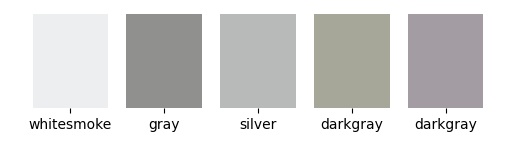

In [126]:
display_palette(get_color_palette_not_as_good(ast.literal_eval(zara.iloc[0]['images'])[-3]))

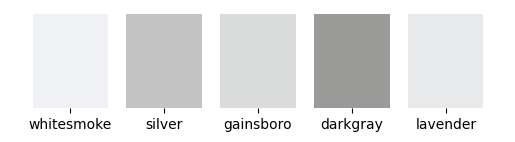

In [127]:
display_palette(get_color_palette(get_image_not_cropped(ast.literal_eval(zara.iloc[0]['images'])[-3])))

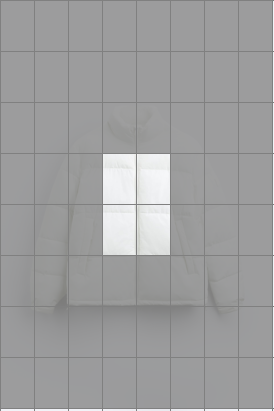

In [133]:
visualize_image_grid(ast.literal_eval(zara.iloc[0]['images'])[-3])

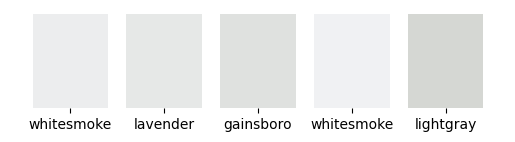

In [191]:
display_palette(get_color_palette(get_image(ast.literal_eval(zara.iloc[0]['images'])[-3])))

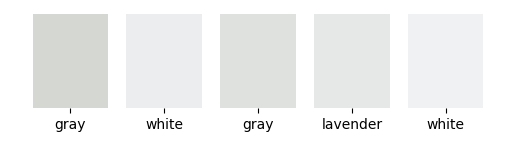

In [177]:
display_palette_cluster(get_color_palette(get_image(ast.literal_eval(zara.iloc[0]['images'])[-3])))

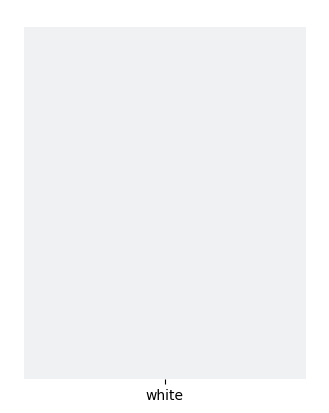

[(240, 241, 243)]

In [193]:
display_palette_cluster(get_color_palette_cluster(get_image(ast.literal_eval(zara.iloc[0]['images'])[-3])))
get_color_palette_cluster(get_image(ast.literal_eval(zara.iloc[0]['images'])[-3]))

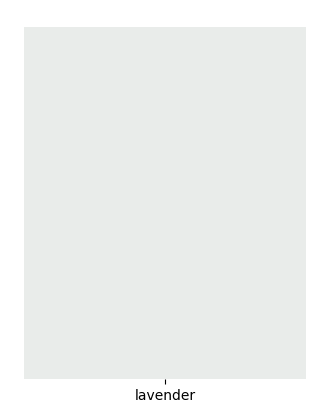

[(233, 236, 234)]

In [273]:
display_palette_cluster(get_color_palette_vibrant(get_image(ast.literal_eval(zara.iloc[0]['images'])[-3])))
get_color_palette_vibrant(get_image(ast.literal_eval(zara.iloc[0]['images'])[-3]))

<img src="https://static.zara.net/photos///2023/I/0/1/p/2587/160/044/2/w/1920/2587160044_6_1_1.jpg?ts=1691581512262" width="300">

In [67]:
ast.literal_eval(zara.iloc[1474]['images'])[-3]

'https://static.zara.net/photos///2023/I/0/1/p/2587/160/044/2/w/1920/2587160044_6_1_1.jpg?ts=1691581512262'

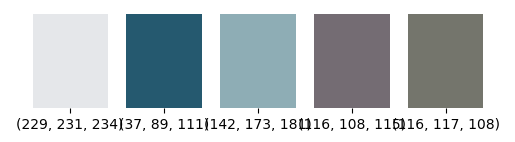

In [85]:
display_palette(get_color_palette_not_as_good(ast.literal_eval(zara.iloc[1474]['images'])[-3]))

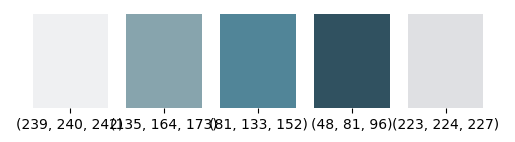

In [72]:
display_palette(get_color_palette(get_image_not_cropped(ast.literal_eval(zara.iloc[1474]['images'])[-3])))

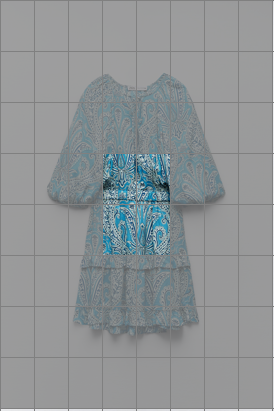

In [102]:
visualize_image_grid(ast.literal_eval(zara.iloc[1474]['images'])[-3])

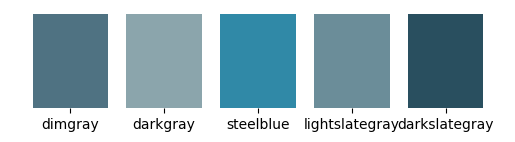

In [129]:
display_palette(get_color_palette(get_image(ast.literal_eval(zara.iloc[1474]['images'])[-3])))

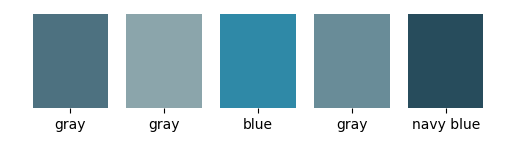

[(106, 141, 153),
 (79, 114, 129),
 (139, 165, 172),
 (47, 137, 167),
 (41, 79, 95)]

In [143]:
display_palette_cluster(get_color_palette(get_image(ast.literal_eval(zara.iloc[1474]['images'])[-3])))
get_color_palette(get_image(ast.literal_eval(zara.iloc[1474]['images'])[-3]))

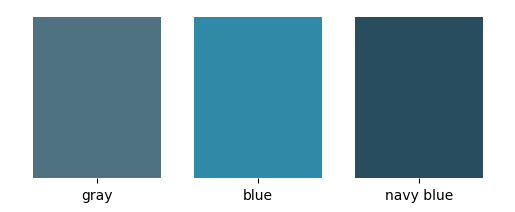

In [247]:
display_palette_cluster(get_color_palette_cluster(get_image(ast.literal_eval(zara.iloc[1474]['images'])[-3])))

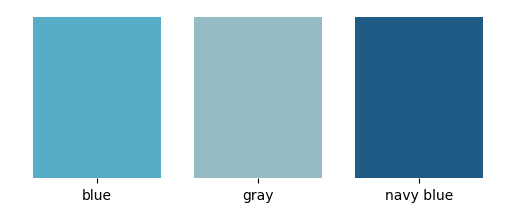

In [271]:
display_palette_cluster(get_color_palette_vibrant(get_image(ast.literal_eval(zara.iloc[1474]['images'])[-3])))

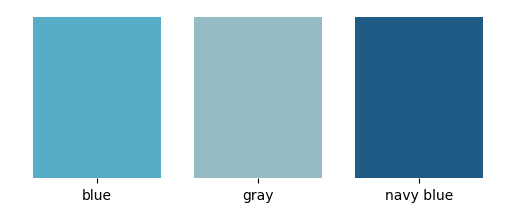

In [272]:
display_palette_cluster(get_color_palette_vibrant(get_image(ast.literal_eval(zara.iloc[1474]['images'])[-3])))

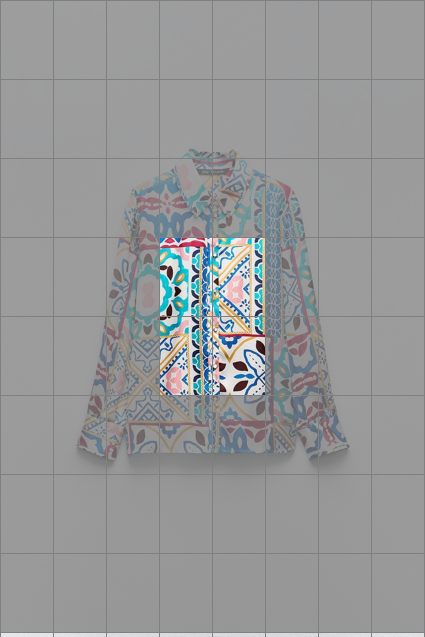

In [199]:
colorful_shirt = 'https://static.zara.net/assets/public/c8bf/7ec5/6115465ab980/b513ca32a495/02929166330-e1/02929166330-e1.jpg?ts=1709907098212&w=850'
visualize_image_grid(colorful_shirt)

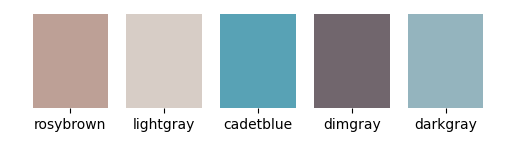

In [201]:
display_palette(get_color_palette(get_image(colorful_shirt)))

In [203]:
get_color_palette(get_image(colorful_shirt))

[(215, 205, 198),
 (150, 182, 193),
 (92, 161, 180),
 (113, 100, 108),
 (186, 160, 150)]

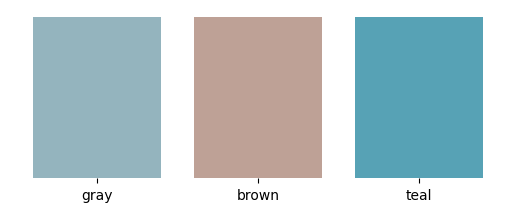

In [200]:
display_palette_cluster(get_color_palette_cluster(get_image(colorful_shirt)))

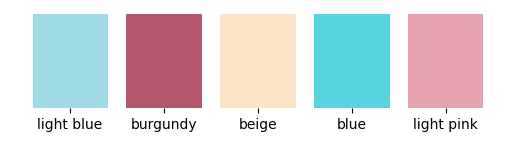

In [270]:
display_palette_cluster(get_color_palette_vibrant(get_image(colorful_shirt)))

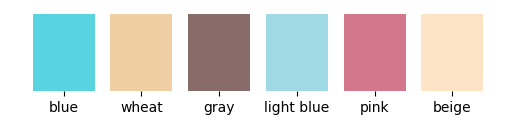

In [269]:
display_palette_cluster(get_color_palette_vibrant(get_image(colorful_shirt), num_colors=7))

# not catching white!

### Extracting colours dinamically in sample dataframe

In [36]:
def colors_rgb(df_images, i):
  try:
    img = get_image(ast.literal_eval(df_images)[i])
  except:
    img = get_image(ast.literal_eval(df_images)[-1])
  colors = get_color_palette(img) # removing 1 assuming white background
  return colors

In [25]:
from datetime import datetime

In [37]:
start = datetime.now()
zara_sample['colors_rgb'] = zara_sample['images'].apply(lambda x: colors_rgb(x, -3))
zara_sample['colors_name'] = zara_sample['colors_rgb'].apply(lambda x: [name_color(value) for value in x])
end = datetime.now()
print('run time:', end - start )
zara_sample.head()

run time: 0:02:06.275134


brand               sku                             name  \
1380  Zara   327718811-330-1  FLORAL PRINT SATIN EFFECT DRESS   
2895  Zara  323797291-800-35           HEELED KNEE HIGH BOOTS   
74    Zara  323050745-798-97         CONTRAST JACQUARD JACKET   
1438  Zara   317337713-676-1           COMBINATION SLIP DRESS   
517   Zara   324908107-922-2       BOXY FIT WASHED SWEATSHIRT   

                                            description  price currency  \
1380  Mini dress with V-neck wrap front and long sle...   59.9      USD   
2895  Over the knee leather boots with block heels. ...  169.0      USD   
74    Full cut jacket with lapel collar and long sle...   89.9      USD   
1438  Midi dress with round neck and adjustable spag...   69.9      USD   
517   Boxy fit hoodie sweatshirt made of cotton with...   49.9      USD   

                                                 images  \
1380  ['https://static.zara.net/photos///2024/V/0/1/...   
2895  ['https://static.zara.net/photos///2023/I/1/1/...   
74    ['https://static.zara.net/photos///2024/V/0/2/...   
1438  ['https://static.zara.net/photos///2024/V/0/1/...   
517   ['https://static.zara.net/photos///2024/V/0/2/...   

                      scraped_at    terms section  \
1380  2024-02-19T09:05:52.165591  dresses   WOMAN   
2895  2024-02-19T09:23:39.697653    shoes   WOMAN   
74    2024-02-19T08:50:51.200272  jackets     MAN   
1438  2024-02-19T09:06:28.415820  dresses   WOMAN   
517   2024-02-19T08:55:40.706503  hoodies     MAN   

                                             colors_rgb  \
1380  [(73, 131, 136), (230, 231, 235), (130, 183, 1...   
2895  [(20, 24, 27), (115, 119, 117), (57, 60, 61), ...   
74    [(175, 161, 147), (82, 68, 58), (201, 196, 189...   
1438  [(236, 206, 190), (205, 162, 148), (137, 102, ...   
517   [(106, 113, 109), (204, 208, 210), (66, 72, 69...   

                                            colors_name  
1380  [slategray, lavender, mediumaquamarine, darksl...  
2895               [black, gray, darkslategray, silver]  
74            [rosybrown, darkolivegreen, silver, gray]  
1438                         [wheat, tan, dimgray, tan]  
517       [dimgray, lightgray, darkslategray, darkgray]

In [38]:
start = datetime.now()
mango_sample['colors_rgb'] = mango_sample['images'].apply(lambda x: colors_rgb(x, -1))
mango_sample['colors_name'] = mango_sample['colors_rgb'].apply(lambda x: [name_color(value) for value in x])
end = datetime.now()
print('run time:', end - start )
zara_sample.head()

run time: 0:01:20.947114


brand               sku                             name  \
1380  Zara   327718811-330-1  FLORAL PRINT SATIN EFFECT DRESS   
2895  Zara  323797291-800-35           HEELED KNEE HIGH BOOTS   
74    Zara  323050745-798-97         CONTRAST JACQUARD JACKET   
1438  Zara   317337713-676-1           COMBINATION SLIP DRESS   
517   Zara   324908107-922-2       BOXY FIT WASHED SWEATSHIRT   

                                            description  price currency  \
1380  Mini dress with V-neck wrap front and long sle...   59.9      USD   
2895  Over the knee leather boots with block heels. ...  169.0      USD   
74    Full cut jacket with lapel collar and long sle...   89.9      USD   
1438  Midi dress with round neck and adjustable spag...   69.9      USD   
517   Boxy fit hoodie sweatshirt made of cotton with...   49.9      USD   

                                                 images  \
1380  ['https://static.zara.net/photos///2024/V/0/1/...   
2895  ['https://static.zara.net/photos///2023/I/1/1/...   
74    ['https://static.zara.net/photos///2024/V/0/2/...   
1438  ['https://static.zara.net/photos///2024/V/0/1/...   
517   ['https://static.zara.net/photos///2024/V/0/2/...   

                      scraped_at    terms section  \
1380  2024-02-19T09:05:52.165591  dresses   WOMAN   
2895  2024-02-19T09:23:39.697653    shoes   WOMAN   
74    2024-02-19T08:50:51.200272  jackets     MAN   
1438  2024-02-19T09:06:28.415820  dresses   WOMAN   
517   2024-02-19T08:55:40.706503  hoodies     MAN   

                                             colors_rgb  \
1380  [(73, 131, 136), (230, 231, 235), (130, 183, 1...   
2895  [(20, 24, 27), (115, 119, 117), (57, 60, 61), ...   
74    [(175, 161, 147), (82, 68, 58), (201, 196, 189...   
1438  [(236, 206, 190), (205, 162, 148), (137, 102, ...   
517   [(106, 113, 109), (204, 208, 210), (66, 72, 69...   

                                            colors_name  
1380  [slategray, lavender, mediumaquamarine, darksl...  
2895               [black, gray, darkslategray, silver]  
74            [rosybrown, darkolivegreen, silver, gray]  
1438                         [wheat, tan, dimgray, tan]  
517       [dimgray, lightgray, darkslategray, darkgray]

In [39]:
df_sample = pd.concat([zara_sample, mango_sample], ignore_index=True)

In [40]:
df_sample.to_csv('zara_and_mango_sample.csv')

## entire data frames and join

In [241]:
mango.terms.unique()

array(['jackets', 'puffers', 'pants', 'jeans', 'sweaters', 'cardigans',
       'hoodies', 't-shirts', 'overshirts', 'linen', 'shorts', 'suits',
       'cargo', 'shoes', 'bags', 'backpack', 'dresses', 'skirts', 'tops',
       'knitwear'], dtype=object)

In [242]:
zara.terms.unique()

array(['jackets', 'puffers', 'pants', 'jeans', 'sweaters', 'cardigans',
       'hoodies', 'sweatshirts', 't-shirts', 'overshirts', 'linen',
       'shorts', 'suits', 'blazers', 'tracksuits', 'coats', 'shoes',
       'bags', 'dresses', 'skirts', 'tops', 'bodysuits', 'knitwear'],
      dtype=object)

In [ ]:
start = datetime.now()
zara['colors_rgb'] = zara['images'].apply(lambda x: colors_rgb(x, -3))
zara['colors_name'] = zara['colors_rgb'].apply(lambda x: [name_color(value) for value in x])
end = datetime.now()
print('run time:', end - start )
zara.head()

run time: 1:42:34.165803


In [ ]:
start = datetime.now()
mango['colors_rgb'] = mango['images'].apply(lambda x: colors_rgb(x, -1))
mango['colors_name'] = mango['colors_rgb'].apply(lambda x: [name_color(value) for value in x])
end = datetime.now()
print('run time:', end - start )
mango.head()

run time: 1:05:19.636826


brand                                                url       sku  \
0  Mango  https://shop.mango.com/fi/women/jackets-and-su...  67050682   
1  Mango  https://shop.mango.com/fi/women/jackets-and-su...  67044062   
2  Mango  https://shop.mango.com/fi/women/jackets-and-su...  67074074   
3  Mango  https://shop.mango.com/fi/women/jackets-and-su...  57035980   
4  Mango  https://shop.mango.com/fi/women/jackets-and-su...  57068270   

                                name  \
0             chaqueta lana cinturón   
1             chaqueta punto botones   
2   chaqueta tweed detalle contraste   
3  cazadora vaquera cordón ajustable   
4           chaqueta acolchada denim   

                                         description  price currency  \
0  wool mix fabric, straight design, crossover de...  69.99      EUR   
1  cotton-blend fabric, medium knit, straight des...  49.99      EUR   
2  tweed fabric, cotton-blend fabric, straight de...  69.99      EUR   
3  denim style cotton fabric, 100% cotton fabric,...  29.99      EUR   
4  denim style cotton fabric, straight design, ro...  34.99      EUR   

                 category                                             images  \
0  chaquetas y americanas  ['https://st.mngbcn.com/rcs/pics/static/T6/fot...   
1  chaquetas y americanas  ['https://st.mngbcn.com/rcs/pics/static/T6/fot...   
2  chaquetas y americanas  ['https://st.mngbcn.com/rcs/pics/static/T6/fot...   
3  chaquetas y americanas  ['https://st.mngbcn.com/rcs/pics/static/T5/fot...   
4  chaquetas y americanas  ['https://st.mngbcn.com/rcs/pics/static/T5/fot...   

                   scraped_at    terms section  \
0  2024-02-21T12:51:19.171380  jackets       H   
1  2024-02-21T12:51:30.009099  jackets       H   
2  2024-02-21T12:51:31.719633  jackets       H   
3  2024-02-21T12:51:32.478754  jackets       H   
4  2024-02-21T12:51:33.032029  jackets       H   

                                     image_downloads  \
0  ['db68f55d-92f1-43e5-b038-f1708dd75daf', '0c1c...   
1  ['3f64f51b-d437-4ae8-89f5-7da1adcb4f4e', 'aee6...   
2  ['76c2fa43-be2b-4d5a-b6a8-04900e32335c', '873f...   
3  ['512ab173-7474-4d2a-8597-5a73429f3ff6', '0d49...   
4  ['622ffabe-2e0e-4f4a-a98f-61a774704501', '73dd...   

                                          colors_rgb  \
0  [(16, 16, 27), (232, 236, 239), (156, 142, 139...   
1  [(236, 237, 241), (157, 140, 131), (223, 224, ...   
2  [(79, 100, 118), (166, 152, 142), (237, 241, 2...   
3  [(236, 238, 242), (121, 84, 82), (188, 163, 16...   
4  [(231, 235, 238), (46, 54, 68), (179, 166, 159...   

                                         colors_name  
0        [black, lavender, rosybrown, darkslategray]  
1       [whitesmoke, gray, gainsboro, darkslategray]  
2    [dimgray, rosybrown, whitesmoke, darkslategray]  
3     [whitesmoke, dimgray, darkgray, darkslategray]  
4  [lavender, darkslategray, darkgray, darkslateb...

In [ ]:
if set(zara.columns) == set(mango.columns):
  df = pd.concat([zara, mango], ignore_index=True)

In [ ]:
df.to_csv('zara_and_mango.csv')

# load entire DF

In [159]:
df = pd.read_csv('zara_and_mango.csv')

In [160]:
df.reset_index()
df.drop(columns=['Unnamed: 0'], inplace=True)
df['colors_name'] = df['colors_name'].apply(ast.literal_eval)
df['colors_rgb'] = df['colors_rgb'].apply(ast.literal_eval)

df.head()

brand               sku                  name  \
0  Zara   272145190-250-2   BASIC PUFFER JACKET   
1  Zara  324052738-800-46         TUXEDO JACKET   
2  Zara  335342680-800-44  SLIM FIT SUIT JACKET   
3  Zara  328303236-420-44   STRETCH SUIT JACKET   
4  Zara   312368260-800-2   DOUBLE FACED JACKET   

                                         description   price currency  \
0  Puffer jacket made of tear-resistant ripstop f...   19.99      USD   
1  Straight fit blazer. Pointed lapel collar and ...  169.00      USD   
2  Slim fit jacket. Notched lapel collar. Long sl...  129.00      USD   
3  Slim fit jacket made of viscose blend fabric. ...  129.00      USD   
4  Jacket made of faux leather faux shearling wit...  139.00      USD   

                   scraped_at    terms section  \
0  2024-02-19T08:50:05.654618  jackets     MAN   
1  2024-02-19T08:50:06.590930  jackets     MAN   
2  2024-02-19T08:50:07.301419  jackets     MAN   
3  2024-02-19T08:50:07.882922  jackets     MAN   
4  2024-02-19T08:50:08.453847  jackets     MAN   

                                          colors_rgb  \
0  [(240, 241, 245), (154, 154, 153), (194, 195, ...   
1  [(18, 18, 18), (197, 198, 202), (130, 130, 134...   
2  [(16, 16, 16), (214, 215, 219), (101, 101, 103...   
3  [(19, 36, 60), (195, 196, 200), (109, 114, 122...   
4  [(69, 70, 70), (153, 154, 153), (31, 33, 32), ...   

                                   colors_name  
0     [whitesmoke, darkgray, silver, lavender]  
1         [black, silver, gray, darkslategray]  
2        [black, gainsboro, dimgray, darkgray]  
3       [midnightblue, silver, dimgray, black]  
4  [darkslategray, darkgray, black, lightgray]

In [244]:
df.terms.value_counts()

shoes          637
pants          589
tops           506
jackets        472
sweaters       441
jeans          398
dresses        334
bags           319
shorts         271
t-shirts       263
skirts         241
suits          115
sweatshirts     98
puffers         96
coats           73
cardigans       67
linen           61
blazers         59
hoodies         44
tracksuits      35
knitwear        24
overshirts       5
cargo            5
backpack         3
bodysuits        1
Name: terms, dtype: int64

### Drop shoes and bags
because i dont trus the color extraction there



In [245]:
df.shape

(5157, 13)

In [246]:
df.drop(df[df['terms'].isin(['bag', 'shoes', 'backpack'])].index, inplace=True) # ~500 entries

In [247]:
df.shape

(4517, 13)

### price to EUR

1 USD = 0.90 EUR (a la baja porque se que zara es mas barato en eur)

In [162]:
def convert_usd_to_eur(row):
    if row['currency'] == 'USD':
        return round(row['price'] * 0.9, 2), 'EUR'
    else:
        return row['price'], row['currency']

df[['converted_price', 'converted_currency']] = df.apply(convert_usd_to_eur, axis=1, result_type='expand')

### Sections

Mango Sections are non sensical. i think it is only womens. lets fix

In [205]:
def convert_section_to_women_for_mango(row):
    if row['brand'] == 'Mango':
        return 'WOMAN'
    else:
        return row['section']

df['section'] = df.apply(convert_section_to_women_for_mango, axis=1)

In [208]:
df.section.unique()

array(['MAN', 'WOMAN'], dtype=object)

# **ANALYSIS**

description of the product:
***topic modeling*** creating clusters.
are procudts with certain colour described as more trendy or something. is there some comon langiuage to incentivise people to buy them .

* have a look at what colour name is peach fuzz pantone 255, 190, 152
for the analyisis and be sure of how many buckets of colours i want and if they make sense etc.

* new features to add to data frame aka functions to make:
    * contains colour of the year or not
    * disparity level. between colours aka all white, all blue or blue red and green in same garment
    * hue vs lightness, maybe i can have a look ath other colour systems and see if it is straight foward to use some features.



trends often bleed to adjecent years. so leets have a look at
* 2023 colour of the year: Viva Magenta (wine)
* 2022 very peri (lileac)

Ideally, we will be able to create a simple user interface to see how popular a colour is this year and get a sense of how big of an impact the choice of that colour would have on your product’s success. We can do a little demo with this app during the presentation.

Overall, we want to construct a story surrounding the impact of colour in products success and make an available tool for designers to use in 2024.

CORRELATIONS between colour and price?

NECESITO SOLUCIONAR
- como identificio si una prenda es un solo color?
- recortar imagen al medio en mi funcion de mirar la foto y extraer los colores
- seleccionar mejor los colores. combinacion entre kmeans y rankings. un dict con los rangos de cada nombre de cada color (rank).



plan:
- leer el word
- organizar una narrativa: **DESIGN A STORY!!**
- trabajar en las funciones para seleccionar colores e identificar monocromatico. Maybe I can printout the percentage of area of that colour. put a threshold and see if it is monocrome or not that way.
- ver los nombres de los colores y como categorizarlos. ver si implementar esto en las funciones de extraccion de color
- ver que EDA hacer con el resto de datos de zara y mango en la narrativa
- ML? (tomar decision hoy)

Hay que tener en cuenta que en fotografias hay muchas sombras. los grises son poco reliables.

In [52]:
import seaborn as sns

In [115]:
df.head()

Unnamed: 0 brand               sku                  name  \
0           0  Zara   272145190-250-2   BASIC PUFFER JACKET   
1           1  Zara  324052738-800-46         TUXEDO JACKET   
2           2  Zara  335342680-800-44  SLIM FIT SUIT JACKET   
3           3  Zara  328303236-420-44   STRETCH SUIT JACKET   
4           4  Zara   312368260-800-2   DOUBLE FACED JACKET   

                                         description   price currency  \
0  Puffer jacket made of tear-resistant ripstop f...   19.99      USD   
1  Straight fit blazer. Pointed lapel collar and ...  169.00      USD   
2  Slim fit jacket. Notched lapel collar. Long sl...  129.00      USD   
3  Slim fit jacket made of viscose blend fabric. ...  129.00      USD   
4  Jacket made of faux leather faux shearling wit...  139.00      USD   

                   scraped_at    terms section  \
0  2024-02-19T08:50:05.654618  jackets     MAN   
1  2024-02-19T08:50:06.590930  jackets     MAN   
2  2024-02-19T08:50:07.301419  jackets     MAN   
3  2024-02-19T08:50:07.882922  jackets     MAN   
4  2024-02-19T08:50:08.453847  jackets     MAN   

                                          colors_rgb  \
0  [(240, 241, 245), (154, 154, 153), (194, 195, ...   
1  [(18, 18, 18), (197, 198, 202), (130, 130, 134...   
2  [(16, 16, 16), (214, 215, 219), (101, 101, 103...   
3  [(19, 36, 60), (195, 196, 200), (109, 114, 122...   
4  [(69, 70, 70), (153, 154, 153), (31, 33, 32), ...   

                                         colors_name  
0   ['whitesmoke', 'darkgray', 'silver', 'lavender']  
1       ['black', 'silver', 'gray', 'darkslategray']  
2      ['black', 'gainsboro', 'dimgray', 'darkgray']  
3     ['midnightblue', 'silver', 'dimgray', 'black']  
4  ['darkslategray', 'darkgray', 'black', 'lightg...

In [120]:
df.reset_index()
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

brand               sku                  name  \
0  Zara   272145190-250-2   BASIC PUFFER JACKET   
1  Zara  324052738-800-46         TUXEDO JACKET   
2  Zara  335342680-800-44  SLIM FIT SUIT JACKET   
3  Zara  328303236-420-44   STRETCH SUIT JACKET   
4  Zara   312368260-800-2   DOUBLE FACED JACKET   

                                         description   price currency  \
0  Puffer jacket made of tear-resistant ripstop f...   19.99      USD   
1  Straight fit blazer. Pointed lapel collar and ...  169.00      USD   
2  Slim fit jacket. Notched lapel collar. Long sl...  129.00      USD   
3  Slim fit jacket made of viscose blend fabric. ...  129.00      USD   
4  Jacket made of faux leather faux shearling wit...  139.00      USD   

                   scraped_at    terms section  \
0  2024-02-19T08:50:05.654618  jackets     MAN   
1  2024-02-19T08:50:06.590930  jackets     MAN   
2  2024-02-19T08:50:07.301419  jackets     MAN   
3  2024-02-19T08:50:07.882922  jackets     MAN   
4  2024-02-19T08:50:08.453847  jackets     MAN   

                                          colors_rgb  \
0  [(240, 241, 245), (154, 154, 153), (194, 195, ...   
1  [(18, 18, 18), (197, 198, 202), (130, 130, 134...   
2  [(16, 16, 16), (214, 215, 219), (101, 101, 103...   
3  [(19, 36, 60), (195, 196, 200), (109, 114, 122...   
4  [(69, 70, 70), (153, 154, 153), (31, 33, 32), ...   

                                         colors_name  
0   ['whitesmoke', 'darkgray', 'silver', 'lavender']  
1       ['black', 'silver', 'gray', 'darkslategray']  
2      ['black', 'gainsboro', 'dimgray', 'darkgray']  
3     ['midnightblue', 'silver', 'dimgray', 'black']  
4  ['darkslategray', 'darkgray', 'black', 'lightg...

In [161]:
from itertools import chain

all_colors = list(chain.from_iterable(df['colors_name']))
unique_colors = set(all_colors)

In [138]:
colors_series = pd.Series(all_colors)
color_counts = colors_series.value_counts()
color_counts

darkslategray    2657
dimgray          2056
black            2041
darkgray         1841
gainsboro        1651
                 ... 
powderblue          1
hotpink             1
lightcyan           1
moccasin            1
indigo              1
Length: 84, dtype: int64

In [140]:
len(set(colors_sample))

84

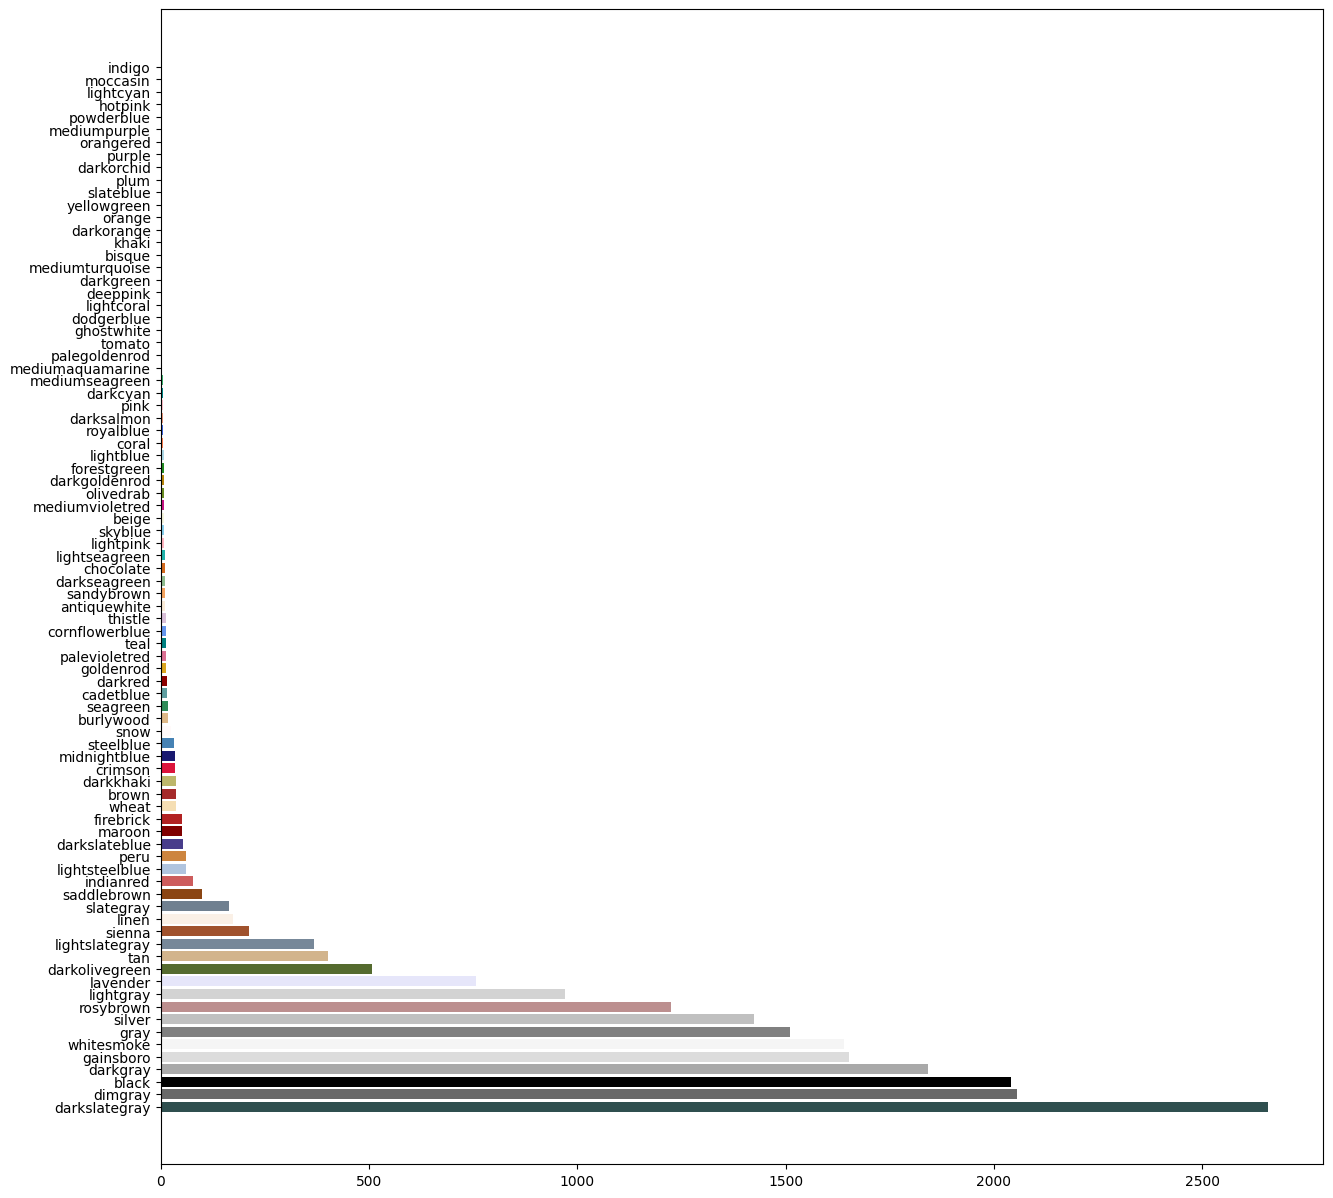

In [251]:
plt.figure(figsize=(15, 15))
plt.barh(color_counts.index,color_counts.values,  color=color_counts.index)
plt.show()

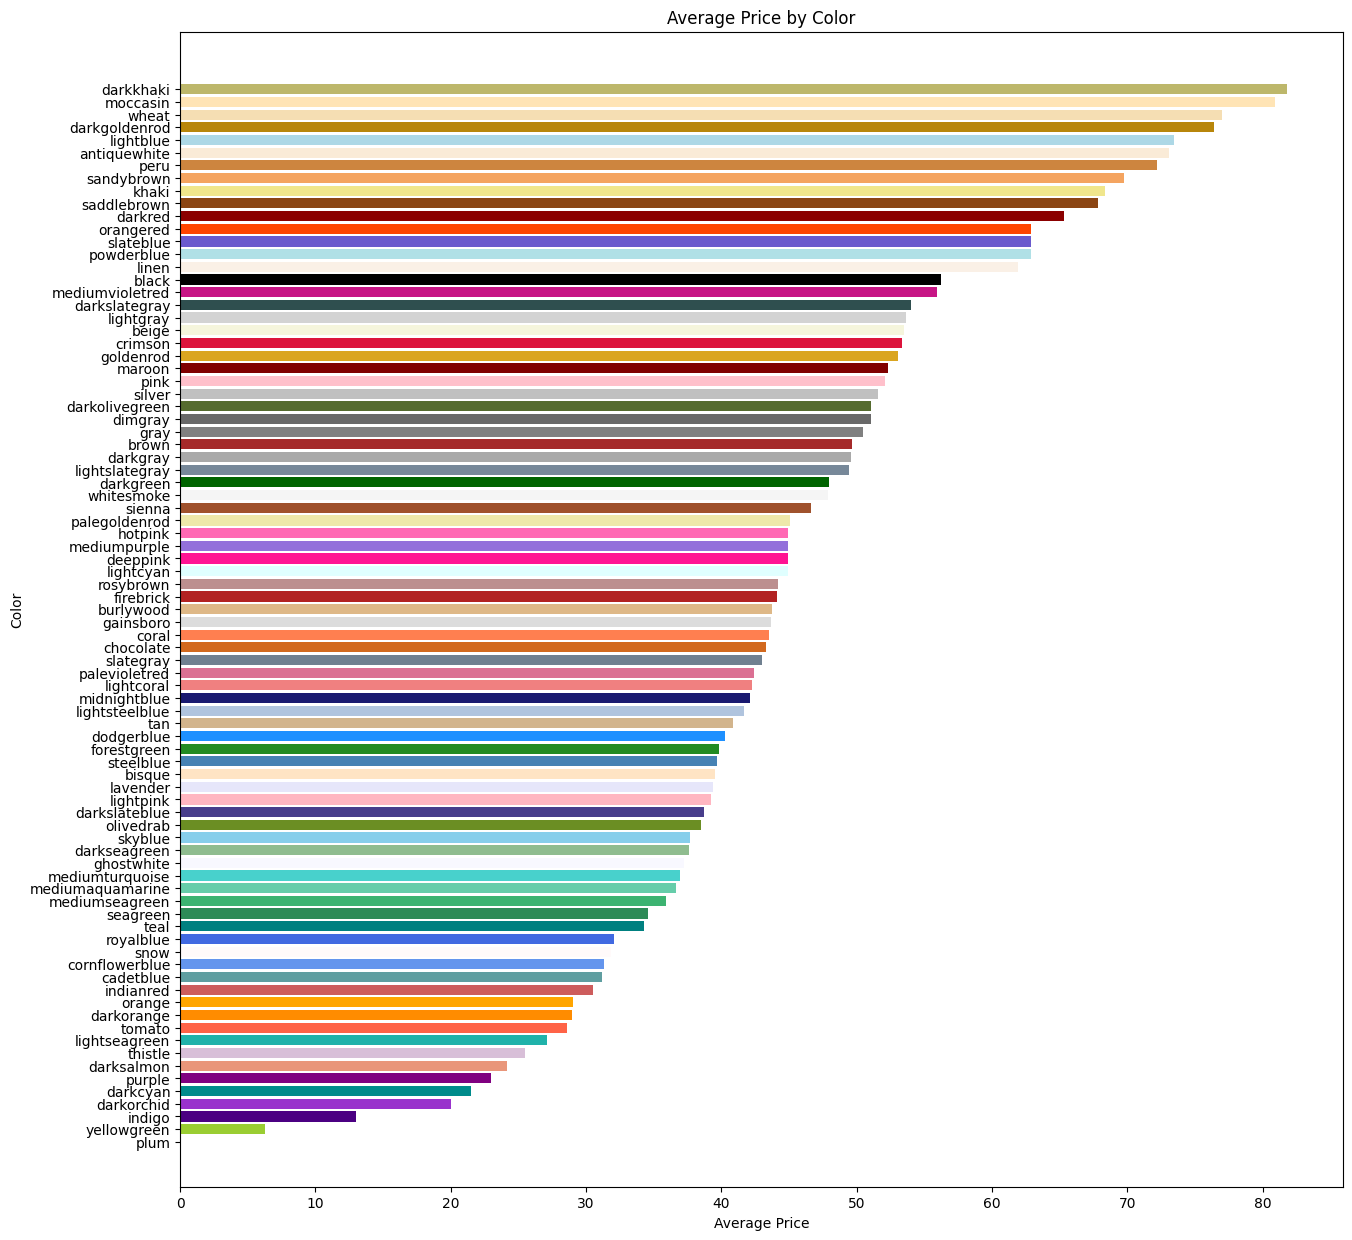

In [250]:
color_price_mapping = {}

for color in unique_colors:
    df_color = df[df['colors_name'].apply(lambda x: color in x)]
    average_price = df_color['converted_price'].mean()
    color_price_mapping[color] = average_price

color_price_df = pd.DataFrame(list(color_price_mapping.items()), columns=['color', 'avg_price'])
color_price_df = color_price_df.sort_values(by='avg_price', ascending=False)

plt.figure(figsize=(15, 15))
plt.barh(color_price_df['color'], color_price_df['avg_price'], color=color_price_df['color'])
plt.xlabel('Average Price')
plt.ylabel('Color')
plt.title('Average Price by Color')
plt.gca().invert_yaxis()  # Invierte el eje y para tener los precios más altos arriba
plt.show()


Separar por hombres y mujeres y categoria.

In [149]:
df.columns

Index(['brand', 'sku', 'name', 'description', 'price', 'currency',
       'scraped_at', 'terms', 'section', 'colors_rgb', 'colors_name'],
      dtype='object')

In [211]:
def plot_average_price_by_color_for_mask(mask, title):
    all_colors = list(chain.from_iterable(df[mask]['colors_name']))
    unique_colors = set(all_colors)

    color_price_mapping = {}
    for color in unique_colors:
        filtered_df = df[mask][df[mask]['colors_name'].apply(lambda x: color in x)]
        average_price = filtered_df['converted_price'].mean()
        color_price_mapping[color] = average_price

    color_price_df = pd.DataFrame(list(color_price_mapping.items()), columns=['color', 'avg_price'])
    color_price_df = color_price_df.sort_values(by='avg_price', ascending=False)

    plt.barh(color_price_df['color'], color_price_df['avg_price'], color=color_price_df['color'])
    plt.xlabel('Average Price')
    plt.ylabel('Color')
    plt.title(title)
    plt.gca().invert_yaxis()

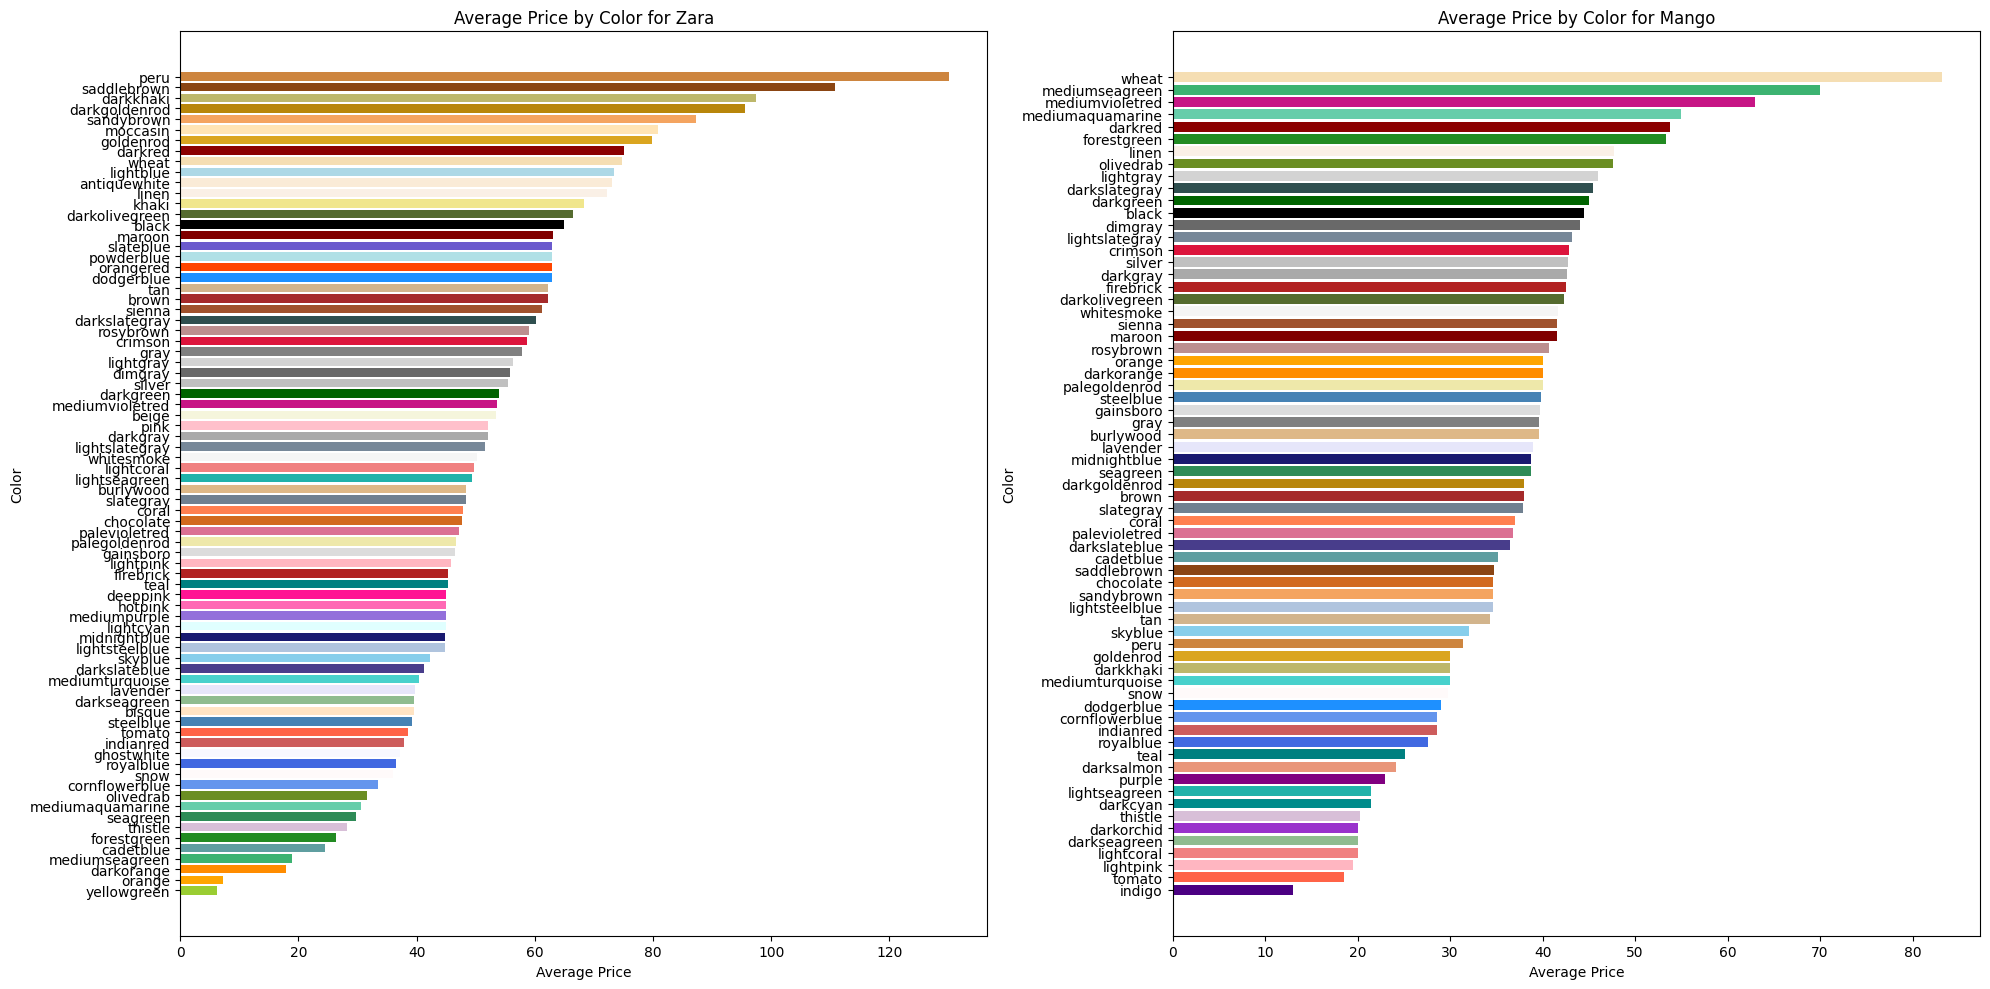

In [249]:
plt.figure(figsize=(20, 10))

# Zara
plt.subplot(1, 2, 1)
plot_average_price_by_color_for_mask(df['brand'].str.lower() == 'zara', 'Average Price by Color for Zara')
# Mango
plt.subplot(1, 2, 2)
plot_average_price_by_color_for_mask(df['brand'].str.lower() == 'mango', 'Average Price by Color for Mango')

plt.tight_layout()
plt.show()

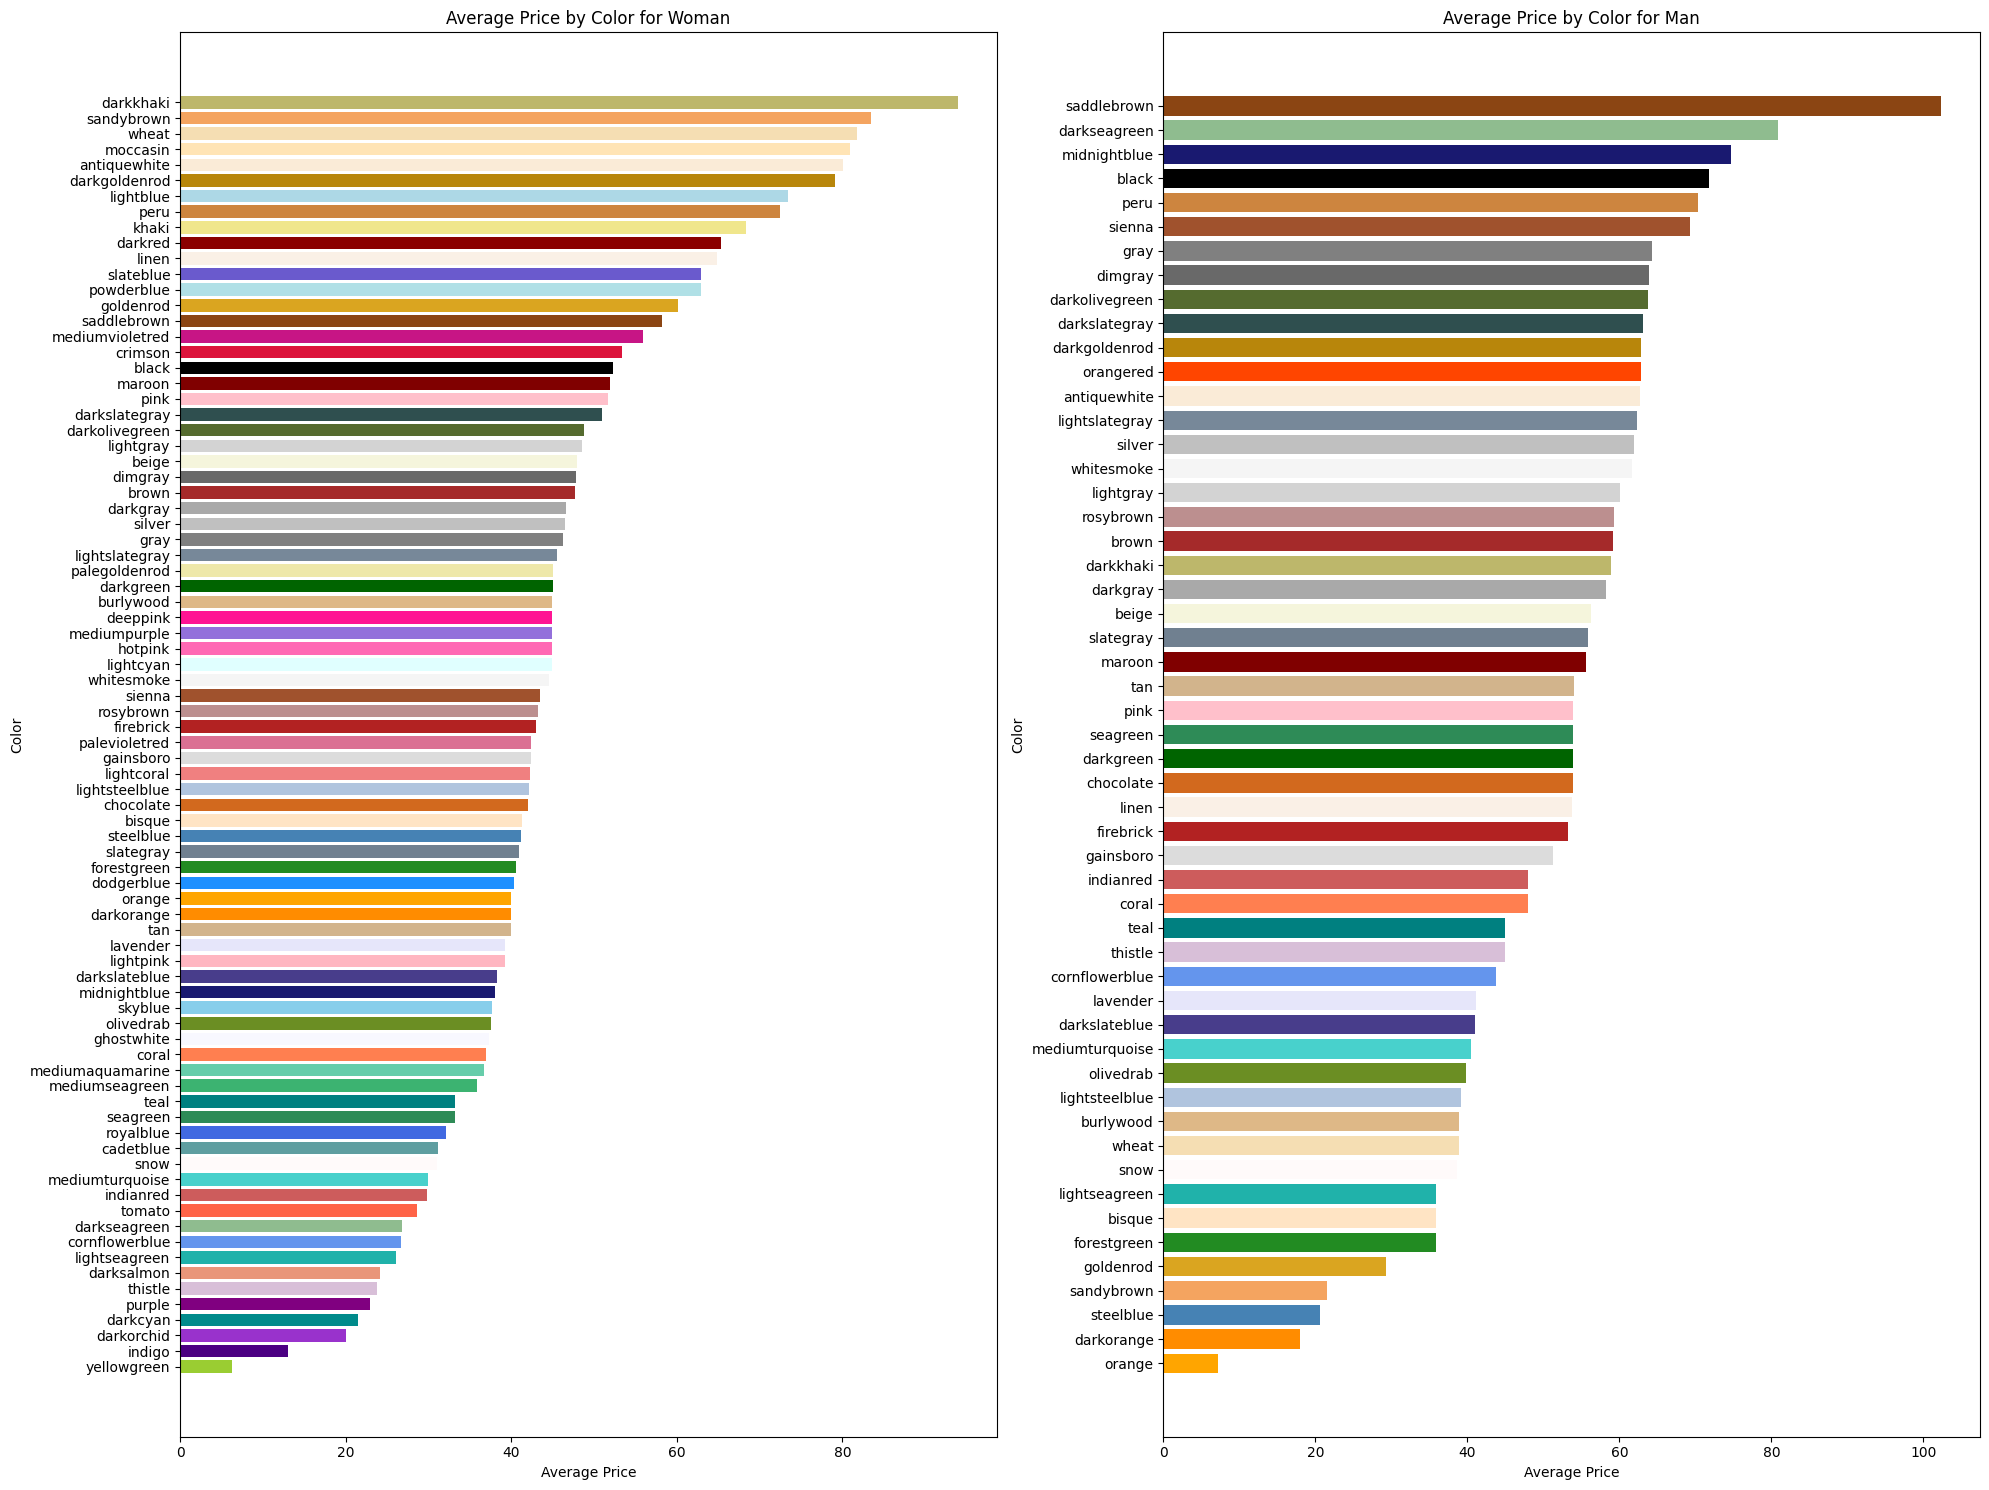

In [248]:
plt.figure(figsize=(20, 15))

# WOMEN
plt.subplot(1, 2, 1)
plot_average_price_by_color_for_mask(df['section'] == 'WOMAN', 'Average Price by Color for Woman')
# MEN
plt.subplot(1, 2, 2)
plot_average_price_by_color_for_mask(df['section'] == 'MAN', 'Average Price by Color for Man')

plt.tight_layout()
plt.show()

In [215]:
df.columns

Index(['brand', 'sku', 'name', 'description', 'price', 'currency',
       'scraped_at', 'terms', 'section', 'colors_rgb', 'colors_name',
       'converted_price', 'converted_currency'],
      dtype='object')

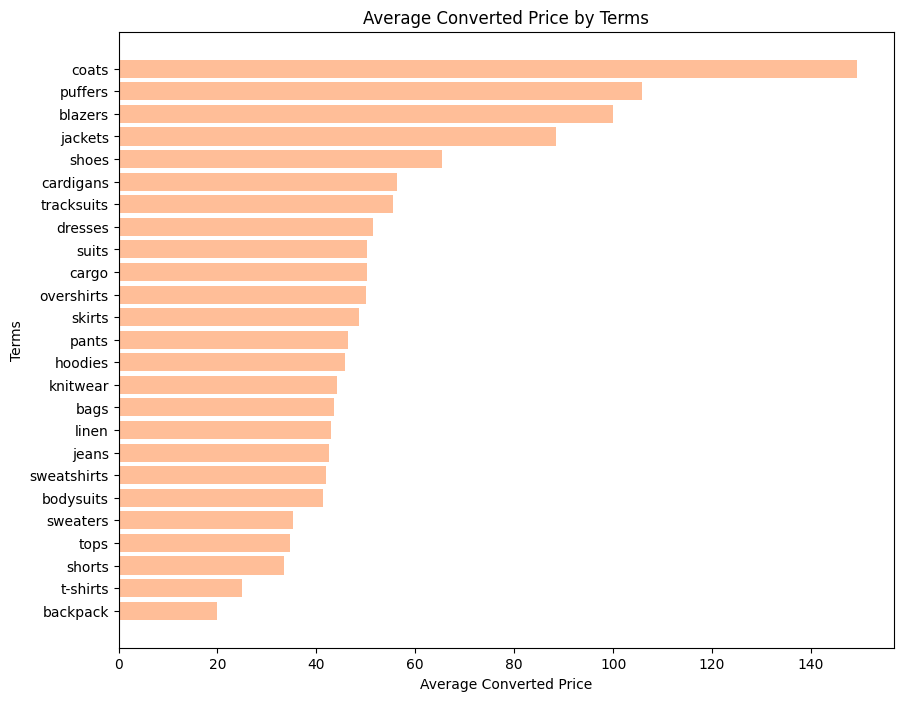

In [224]:

grouped_mean = df.groupby('terms')['converted_price'].mean().reset_index()

sorted_grouped_mean = grouped_mean.sort_values(by='converted_price', ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(sorted_grouped_mean['terms'], sorted_grouped_mean['converted_price'], color=color_of_the_year)
plt.xlabel('Average Converted Price')
plt.ylabel('Terms')
plt.title('Average Converted Price by Terms')
plt.show()


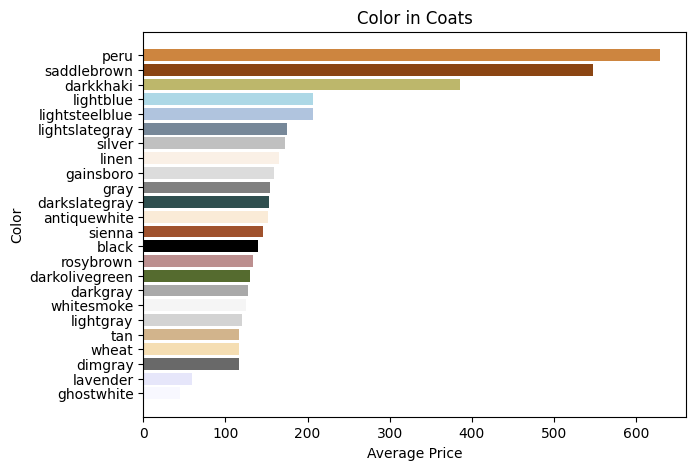

In [229]:
plt.figure(figsize=(7, 5))
plot_average_price_by_color_for_mask(df['terms'] == 'coats', 'Color in Coats')

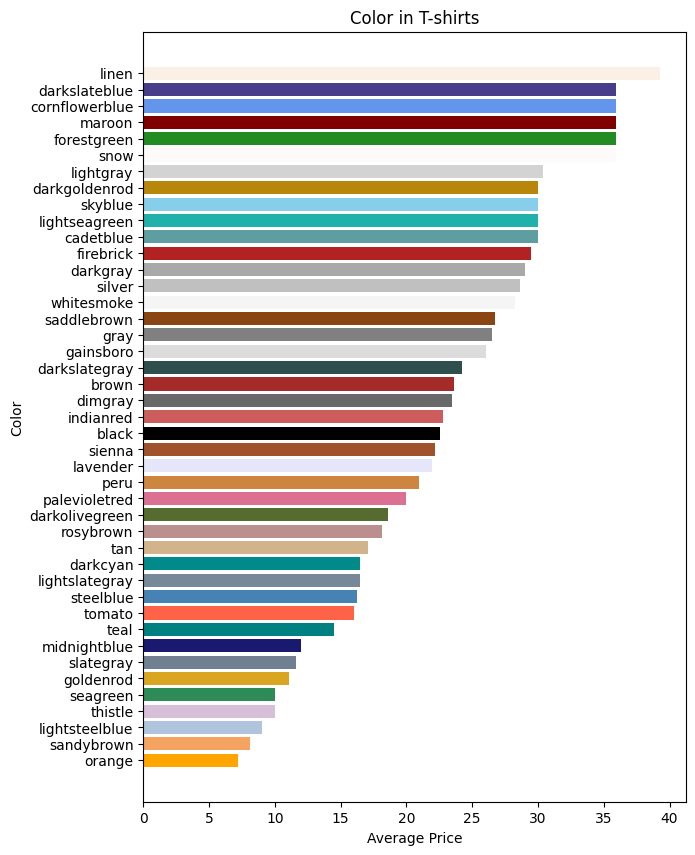

In [230]:
plt.figure(figsize=(7, 10))
plot_average_price_by_color_for_mask(df['terms'] == 't-shirts', 'Color in T-shirts')

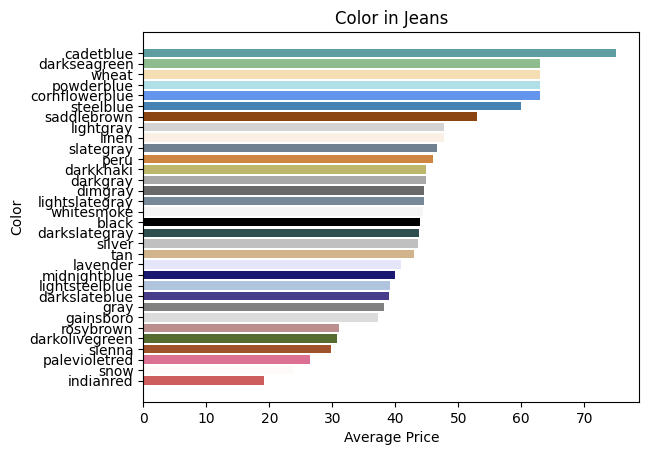

In [240]:
plot_average_price_by_color_for_mask(df['terms'] == 'jeans', 'Color in Jeans')

how to take the project further with more data from 2025 for example.
So we can crreate some finctions and see if bulks of colour proportuiosns remain or not. if there are big changes there is probably a big trend behind it.